# Comparing different datasets, T-cells

- Raw protein data is used in comparisons of surface markers between different datasets in this notebook
- focusing on T-cells 

Datasets:

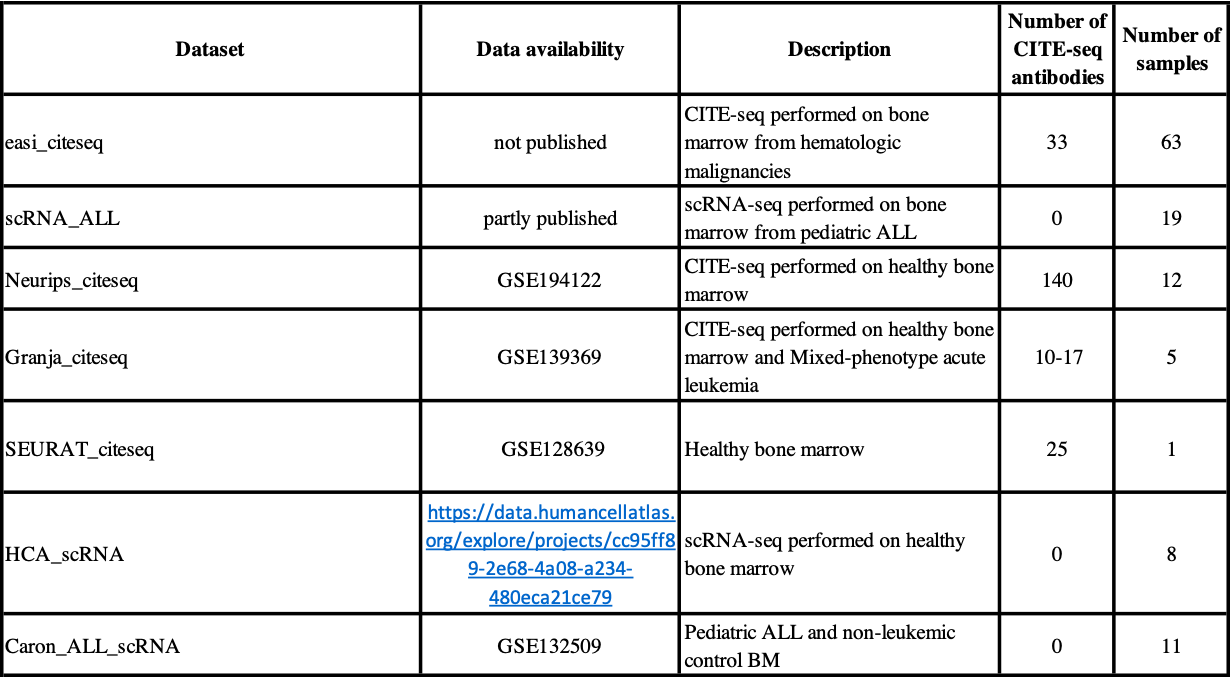

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#raw protein data, all datasets

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/healthy_malig_!m.h5ad')


## Neurips

In [3]:
#Neurips

adata_n=adata[adata.obs['batch_group'] == 'Neurips' ]

adata_n

View of AnnData object with n_obs × n_vars = 80998 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [4]:
adata_n.obs['DIAGNOSIS'] 

GTAGTACCAATCCTTT-1-s4d1    healthy
CTCAAGAGTCACAGAG-1-s4d1    healthy
CTGTGGGTCATGCGGC-1-s4d1    healthy
CGTGATAGTTATCTGG-1-s4d1    healthy
AGATCCAAGATCGGTG-1-s4d1    healthy
                            ...   
GTGGTTAGTCGAGTTT-1-s1d3    healthy
GCTACAACAGTGCGCT-1-s1d3    healthy
AACAAAGGTTGGTACT-1-s1d3    healthy
TGACAGTCATGGCTGC-1-s1d3    healthy
CTGGCAGGTCTCACGG-1-s1d3    healthy
Name: DIAGNOSIS, Length: 80998, dtype: category
Categories (1, object): ['healthy']

In [5]:
adata_n.obs['new_cell_type'].unique()

['NK', 'T', 'Prog', 'Myel', 'B', 'DC', 'E', 'Normoblast']
Categories (8, object): ['B', 'DC', 'E', 'Myel', 'NK', 'Normoblast', 'Prog', 'T']

In [6]:
#Select only T-cells

neurips_tcell=adata_n[adata_n.obs['new_cell_type'] == 'T' ]

In [7]:
neurips_tcell

View of AnnData object with n_obs × n_vars = 26775 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [8]:
neurips_tcell_prot=neurips_tcell.obsm['protein_expression']

In [9]:
neurips_tcell_prot

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  \
CTCAAGAGTCACAGAG-1-s4d1     2     10     47      4     18    73   146     9   
AAGCCATCATAATCCG-1-s4d1     2     16     38      5     19   171   124     9   
TAGATCGCAGCCTTCT-1-s4d1     0     14     36      5     14    48    75     9   
TGGAGGACAAGATCCT-1-s4d1     6      5     41      4     15    85    95     8   
ATCTTCATCCCTCGAT-1-s4d1     1     12     27      7     10   135   152    10   
...                       ...    ...    ...    ...    ...   ...   ...   ...   
GTGGTTAGTCGAGTTT-1-s1d3     0      1     12      0      4    70    66     3   
GCTACAACAGTGCGCT-1-s1d3     1      3     16      0      7    54    97     3   
AACAAAGGTTGGTACT-1-s1d3     1      2     22      1      3   180   205     3   
TGACAGTCATGGCTGC-1-s1d3     1      6     13      1      1    83   128     1   
CTGGCAGGTCTCACGG-1-s1d3     0      4     18      0      3   112   159     5   

                         CD154  CD52  ...  CD101  CD88  CD224  CD197  CD34  \
CTCAAGAGTCACAGAG-1-s4d1     52    23  ...     51    11     19      0     0   
AAGCCATCATAATCCG-1-s4d1     55   120  ...     21    31     80      0     0   
TAGATCGCAGCCTTCT-1-s4d1     42    17  ...     42    18     13      0     0   
TGGAGGACAAGATCCT-1-s4d1     48    28  ...     15    22     20      0     0   
ATCTTCATCCCTCGAT-1-s4d1     68    68  ...     14    19     22      0     0   
...                        ...   ...  ...    ...   ...    ...    ...   ...   
GTGGTTAGTCGAGTTT-1-s1d3      9    58  ...      7     6      6      0     0   
GCTACAACAGTGCGCT-1-s1d3     13    58  ...     32    13      7      0     0   
AACAAAGGTTGGTACT-1-s1d3     18   120  ...     28     8      4      0     0   
TGACAGTCATGGCTGC-1-s1d3     11    44  ...     21     9     15      0     0   
CTGGCAGGTCTCACGG-1-s1d3     14    87  ...     16     6      4      0     0   

                         CD10  CD90  CD15  CD117  CD66ace  
CTCAAGAGTCACAGAG-1-s4d1     0     0     0      0        0  
AAGCCATCATAATCCG-1-s4d1     0     0     0      0        0  
TAGATCGCAGCCTTCT-1-s4d1     0     0     0      0        0  
TGGAGGACAAGATCCT-1-s4d1     0     0     0      0        0  
ATCTTCATCCCTCGAT-1-s4d1     0     0     0      0        0  
...                       ...   ...   ...    ...      ...  
GTGGTTAGTCGAGTTT-1-s1d3     0     0     0      0        0  
GCTACAACAGTGCGCT-1-s1d3     0     0     0      0        0  
AACAAAGGTTGGTACT-1-s1d3     0     0     0      0        0  
TGACAGTCATGGCTGC-1-s1d3     0     0     0      0        0  
CTGGCAGGTCTCACGG-1-s1d3     0     0     0      0        0  

[26775 rows x 141 columns]

In [10]:
#To exclude columns that contain only zeros

neurips_tcell_prot = pd.DataFrame(neurips_tcell_prot)
neurips_tcell_prot != 0
(neurips_tcell_prot != 0).any(axis=0)
neurips_tcell_prot.loc[:, (neurips_tcell_prot != 0).any(axis=0)]
neurips_tcell_prot = neurips_tcell_prot.loc[:, (neurips_tcell_prot != 0).any(axis=0)]

for col in neurips_tcell_prot:
    print(col)

CD86
CD274
CD270
CD155
CD112
CD47
CD48
CD40
CD154
CD52
CD3
CD8
CD56
CD19
CD33
CD11c
HLA-A-B-C
CD45RA
CD123
CD7
CD105
CD49f
CD194
CD4
CD44
CD14
CD16
CD25
CD45RO
CD279
TIGIT
CD20
CD335
CD31
Podoplanin
CD146
IgM
CD5
CD195
CD32
CD196
CD185
CD103
CD69
CD62L
CD161
CD152
CD223
KLRG1
CD27
CD107a
CD95
CD134
HLA-DR
CD1c
CD11b
CD64
CD141
CD1d
CD314
CD35
CD57
CD272
CD278
CD58
CD39
CX3CR1
CD24
CD21
CD11a
CD79b
CD244
CD169
integrinB7
CD268
CD42b
CD54
CD62P
CD119
TCR
CD192
CD122
FceRIa
CD41
CD137
CD163
CD83
CD124
CD13
CD2
CD226
CD29
CD303
CD49b
CD81
IgD
CD18
CD28
CD38
CD127
CD45
CD22
CD71
CD26
CD115
CD63
CD304
CD36
CD172a
CD72
CD158
CD93
CD49a
CD49d
CD73
CD9
TCRVa7.2
TCRVd2
LOX-1
CD158b
CD158e1
CD142
CD319
CD352
CD94
CD162
CD85j
CD23
CD328
HLA-E
CD82
CD101
CD88
CD224


## Granja

In [12]:
adata_granja=adata[adata.obs['batch_group'] == 'Granja' ]

adata_granja

View of AnnData object with n_obs × n_vars = 24204 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [13]:
adata_granja.obs['DIAGNOSIS'] 

BMMC_D1T1:AAACCCAAGATGCAGC-1    healthy
BMMC_D1T1:AAACCCACAAACTCGT-1    healthy
BMMC_D1T1:AAACCCACAGTGTACT-1    healthy
BMMC_D1T1:AAACCCATCGCTATTT-1    healthy
BMMC_D1T1:AAACGAACACCCAATA-1    healthy
                                 ...   
MPAL5_T1:TTTGTCAAGCGTGAGT-1        MPAL
MPAL5_T1:TTTGTCACACGTCAGC-1        MPAL
MPAL5_T1:TTTGTCACATCGTCGG-1        MPAL
MPAL5_T1:TTTGTCACATTTCACT-1        MPAL
MPAL5_T1:TTTGTCATCGTAGGAG-1        MPAL
Name: DIAGNOSIS, Length: 24204, dtype: category
Categories (2, object): ['MPAL', 'healthy']

In [14]:
adata_granja.obs['cell_type'].unique().to_list()

['CD4+ T 1',
 'CD14+ monocyte 1',
 'Pre B',
 'Pro B',
 'CD8+ T',
 'Promonocyte',
 'CD14+ monocyte 2',
 'Plasmacytoid dendritic cell',
 'NK T 2',
 'Immature B',
 'Late erythoid precursor 1',
 'Pre B (cycling)',
 'NK',
 'Late erythoid precursor 3',
 'Early erythoid precursor',
 'CD16+ monocyte',
 'Conventional dendritic cell',
 'HSC',
 'NK T 1',
 'Late erythoid precursor 2',
 'Plasma B cell',
 'Stromal cell',
 'Megakaryocyte',
 nan]

In [15]:
#Select T-cells
granja_tcell=adata_granja[adata_granja.obs['new_cell_type'] == 'T' ]

In [16]:
granja_tcell

View of AnnData object with n_obs × n_vars = 4489 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [17]:
granja_tcell_prot=granja_tcell.obsm['protein_expression']

granja_tcell_prot

CD86  CD274  CD270  CD155  CD112  CD47  CD48  \
BMMC_D1T1:AAACCCAAGATGCAGC-1     0      0      0      0      0     0     0   
BMMC_D1T1:AAACGAACAGCAGTCC-1     0      0      0      0      0     0     0   
BMMC_D1T1:AAACGAACATGACGAG-1     0      0      0      0      0     0     0   
BMMC_D1T1:AAACGAATCAAGCCAT-1     0      0      0      0      0     0     0   
BMMC_D1T1:AAACGCTAGCCGTAAG-1     0      0      0      0      0     0     0   
...                            ...    ...    ...    ...    ...   ...   ...   
BMMC_D1T2:TTTGGTTGTCTTCATT-1     0      0      0      0      0     0     0   
BMMC_D1T2:TTTGGTTTCACGATCA-1     0      0      0      0      0     0     0   
BMMC_D1T2:TTTGGTTTCCACATAG-1     0      0      0      0      0     0     0   
BMMC_D1T2:TTTGTTGCAGTGGTGA-1     0      0      0      0      0     0     0   
BMMC_D1T2:TTTGTTGCATGTGTCA-1     0      0      0      0      0     0     0   

                              CD40  CD154  CD52  ...  CD101  CD88  CD224  \
BMMC_D1T1:AAACCCAAGATGCAGC-1     0      0     0  ...      0     0      0   
BMMC_D1T1:AAACGAACAGCAGTCC-1     0      0     0  ...      0     0      0   
BMMC_D1T1:AAACGAACATGACGAG-1     0      0     0  ...      0     0      0   
BMMC_D1T1:AAACGAATCAAGCCAT-1     0      0     0  ...      0     0      0   
BMMC_D1T1:AAACGCTAGCCGTAAG-1     0      0     0  ...      0     0      0   
...                            ...    ...   ...  ...    ...   ...    ...   
BMMC_D1T2:TTTGGTTGTCTTCATT-1     0      0     0  ...      0     0      0   
BMMC_D1T2:TTTGGTTTCACGATCA-1     0      0     0  ...      0     0      0   
BMMC_D1T2:TTTGGTTTCCACATAG-1     0      0     0  ...      0     0      0   
BMMC_D1T2:TTTGTTGCAGTGGTGA-1     0      0     0  ...      0     0      0   
BMMC_D1T2:TTTGTTGCATGTGTCA-1     0      0     0  ...      0     0      0   

                              CD197  CD34  CD10  CD90  CD15  CD117  CD66ace  
BMMC_D1T1:AAACCCAAGATGCAGC-1      0     0     0     0    34      0        0  
BMMC_D1T1:AAACGAACAGCAGTCC-1      0     0     0     0    44      0        0  
BMMC_D1T1:AAACGAACATGACGAG-1      0     0     0     0    64      0        0  
BMMC_D1T1:AAACGAATCAAGCCAT-1      0     0     0     0    45      0        0  
BMMC_D1T1:AAACGCTAGCCGTAAG-1      0     0     0     0    58      0        0  
...                             ...   ...   ...   ...   ...    ...      ...  
BMMC_D1T2:TTTGGTTGTCTTCATT-1      0     0     0     0    36      0        0  
BMMC_D1T2:TTTGGTTTCACGATCA-1      0     0     0     0    44      0        0  
BMMC_D1T2:TTTGGTTTCCACATAG-1      0     0     0     0    33      0        0  
BMMC_D1T2:TTTGTTGCAGTGGTGA-1      0     0     0     0    38      0        0  
BMMC_D1T2:TTTGTTGCATGTGTCA-1      0     0     0     0    58      0        0  

[4489 rows x 141 columns]

In [18]:
#To exclude columns that contain only zeros

granja_tcell_prot = pd.DataFrame(granja_tcell_prot)
granja_tcell_prot != 0
(granja_tcell_prot != 0).any(axis=0)
granja_tcell_prot.loc[:, (granja_tcell_prot != 0).any(axis=0)]
granja_tcell_prot = granja_tcell_prot.loc[:, (granja_tcell_prot != 0).any(axis=0)]

for col in granja_tcell_prot:
    print(col)

CD3
CD8
CD56
CD19
CD45RA
CD4
CD14
CD16
CD25
CD45RO
CD279
TIGIT
CD127
CD15


## Easigenomics

### Comments:

- Only NKT annotation available (NK- + T-cells)

In [19]:

adata_f=adata[adata.obs['batch_group'] == 'Easi' ]

adata_f

View of AnnData object with n_obs × n_vars = 121340 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [20]:
adata_f.obs['DIAGNOSIS'] 

AAACCTGAGCCCTAAT-1-100    Aplastic anemia
AAACCTGCAAGCCGCT-1-100    Aplastic anemia
AAACCTGCACTGTCGG-1-100    Aplastic anemia
AAACCTGCAGACGCTC-1-100    Aplastic anemia
AAACCTGTCCTTAATC-1-100    Aplastic anemia
                               ...       
TTTGTCAGTACATCCA-1-158              B-ALL
TTTGTCAGTAGGCATG-1-158              B-ALL
TTTGTCAGTATGCTTG-1-158              B-ALL
TTTGTCATCAAACCAC-1-158              B-ALL
TTTGTCATCCATGAAC-1-158              B-ALL
Name: DIAGNOSIS, Length: 121340, dtype: category
Categories (10, object): ['AML', 'Aplastic anemia', 'B-ALL', 'Blastic plasmacytoid dendritic cell leukemia', ..., 'Multiple myeloma', 'Plasma cell leukemia', 'RAEB-2', 'T-ALL']

In [21]:
adata_f.obs['cell_type'].unique().to_list()

['NKT',
 'non-leukemic',
 'preleukemic',
 'non-leukemic?',
 nan,
 'leukemic',
 'leukemic?',
 'doublets?',
 'unknown',
 '0',
 'preleukemic?']

In [25]:
#Select NK + T

easi_nkt=adata_f[adata_f.obs['cell_type'] == 'NKT' ]

In [26]:
easi_nkt

View of AnnData object with n_obs × n_vars = 27738 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [27]:
easi_nkt_prot=easi_nkt.obsm['protein_expression']

easi_nkt_prot

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  \
AAACCTGAGCCCTAAT-1-100     0      0      0      0      0     0     0     0   
AAACCTGCAGACGCTC-1-100     0      0      0      0      0     0     0     0   
AAACCTGTCCTTAATC-1-100     0      0      0      0      0     0     0     0   
AAACGGGGTCTCTCGT-1-100     0      0      0      0      0     0     0     0   
AAAGATGTCCAGTAGT-1-100     0      0      0      0      0     0     0     0   
...                      ...    ...    ...    ...    ...   ...   ...   ...   
TTAGGCACAGAAGCAC-1-158     0      0      0      0      0     0     0     0   
TTCTACAGTGAGCGAT-1-158     0      0      0      0      0     0     0     0   
TTGAACGAGCGGATCA-1-158     0      0      0      0      0     0     0     0   
TTGCCGTAGATCCGAG-1-158     0      0      0      0      0     0     0     0   
TTTGCGCTCTGTCTCG-1-158     0      0      0      0      0     0     0     0   

                        CD154  CD52  ...  CD101  CD88  CD224  CD197  CD34  \
AAACCTGAGCCCTAAT-1-100      0     0  ...      0     0      0     17    25   
AAACCTGCAGACGCTC-1-100      0     0  ...      0     0      0     28    34   
AAACCTGTCCTTAATC-1-100      0     0  ...      0     0      0     20    27   
AAACGGGGTCTCTCGT-1-100      0     0  ...      0     0      0     22    21   
AAAGATGTCCAGTAGT-1-100      0     0  ...      0     0      0     19    22   
...                       ...   ...  ...    ...   ...    ...    ...   ...   
TTAGGCACAGAAGCAC-1-158      0     0  ...      0     0      0      4    15   
TTCTACAGTGAGCGAT-1-158      0     0  ...      0     0      0      4    11   
TTGAACGAGCGGATCA-1-158      0     0  ...      0     0      0      5    10   
TTGCCGTAGATCCGAG-1-158      0     0  ...      0     0      0      4    23   
TTTGCGCTCTGTCTCG-1-158      0     0  ...      0     0      0      6    12   

                        CD10  CD90  CD15  CD117  CD66ace  
AAACCTGAGCCCTAAT-1-100    17     0    43     11       25  
AAACCTGCAGACGCTC-1-100    12     0    51     14       21  
AAACCTGTCCTTAATC-1-100    16     0    30     10       17  
AAACGGGGTCTCTCGT-1-100    19     0    43      7       25  
AAAGATGTCCAGTAGT-1-100     7     0    47     14       15  
...                      ...   ...   ...    ...      ...  
TTAGGCACAGAAGCAC-1-158   105     0     9      4        4  
TTCTACAGTGAGCGAT-1-158    68     0     7      1        7  
TTGAACGAGCGGATCA-1-158    40     0     6      1        9  
TTGCCGTAGATCCGAG-1-158   151     0    11      4        8  
TTTGCGCTCTGTCTCG-1-158    36     0     9      1        2  

[27738 rows x 141 columns]

In [28]:
#To exclude columns that contain only zeros

easi_nkt_prot = pd.DataFrame(easi_nkt_prot)
easi_nkt_prot != 0
(easi_nkt_prot != 0).any(axis=0)
easi_nkt_prot.loc[:, (easi_nkt_prot != 0).any(axis=0)]
easi_nkt_prot = easi_nkt_prot.loc[:, (easi_nkt_prot != 0).any(axis=0)]

for col in easi_nkt_prot:
    print(col)

CD3
CD8
CD56
CD19
CD33
CD11c
CD45RA
CD123
CD7
CD4
CD44
CD14
CD45RO
CD20
CD5
HLA-DR
CD11b
CD64
CD58
CD24
CD13
CD2
CD81
CD38
CD127
CD45
CD73
CD197
CD34
CD10
CD15
CD117
CD66ace


## Seurat 

In [29]:
#Seurat

adata_s=adata[adata.obs['batch_group'] == 'Seurat' ]

adata_s

View of AnnData object with n_obs × n_vars = 29556 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [30]:
adata_s.obs['DIAGNOSIS'] 

a_AAACCTGAGCTTATCG-1    healthy
a_AAACCTGAGGTGGGTT-1    healthy
a_AAACCTGAGTACATGA-1    healthy
a_AAACCTGCAAACCTAC-1    healthy
a_AAACCTGCAAGGTGTG-1    healthy
                         ...   
b_TTTGTCATCCGAGCCA-1    healthy
b_TTTGTCATCCGTAGGC-1    healthy
b_TTTGTCATCCTCGCAT-1    healthy
b_TTTGTCATCGCCGTGA-1    healthy
b_TTTGTCATCGTTTGCC-1    healthy
Name: DIAGNOSIS, Length: 29556, dtype: category
Categories (1, object): ['healthy']

In [31]:
adata_s.obs['cell_type'].unique().to_list()

['Prog_RBC',
 'gdT',
 'CD4 Naive',
 'CD4 Memory',
 'CD14 Mono',
 'Naive B',
 'CD8 Naive',
 'Treg',
 'CD8 Effector_2',
 'NK',
 'GMP',
 'CD8 Effector_1',
 'CD16 Mono',
 'pDC',
 'CD8 Memory_1',
 'MAIT',
 'Memory B',
 'cDC2',
 'CD56 bright NK',
 'Prog_B 2',
 'Prog_Mk',
 'CD8 Memory_2',
 'Plasmablast',
 'HSC',
 'LMPP',
 'Prog_DC',
 'Prog_B 1']

In [32]:
#Select T-cells

seurat_tcell=adata_s[adata_s.obs['new_cell_type'] == 'T' ]

In [33]:
seurat_tcell

View of AnnData object with n_obs × n_vars = 14664 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [34]:
seurat_tcell_prot=seurat_tcell.obsm['protein_expression']

seurat_tcell_prot

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  \
a_AAACCTGAGGTGGGTT-1     0      0      0      0      0     0     0     0   
a_AAACCTGAGTACATGA-1     0      0      0      0      0     0     0     0   
a_AAACCTGCAAACCTAC-1     0      0      0      0      0     0     0     0   
a_AAACCTGCACTTGGAT-1     0      0      0      0      0     0     0     0   
a_AAACCTGCAGGCAGTA-1     0      0      0      0      0     0     0     0   
...                    ...    ...    ...    ...    ...   ...   ...   ...   
b_TTTGTCATCATAGCAC-1     0      0      0      0      0     0     0     0   
b_TTTGTCATCCGAGCCA-1     0      0      0      0      0     0     0     0   
b_TTTGTCATCCGTAGGC-1     0      0      0      0      0     0     0     0   
b_TTTGTCATCGCCGTGA-1     0      0      0      0      0     0     0     0   
b_TTTGTCATCGTTTGCC-1     0      0      0      0      0     0     0     0   

                      CD154  CD52  ...  CD101  CD88  CD224  CD197  CD34  CD10  \
a_AAACCTGAGGTGGGTT-1      0     0  ...      0     0      0      2     4     0   
a_AAACCTGAGTACATGA-1      0     0  ...      0     0      0      4     4     0   
a_AAACCTGCAAACCTAC-1      0     0  ...      0     0      0     12     7     0   
a_AAACCTGCACTTGGAT-1      0     0  ...      0     0      0     17     1     0   
a_AAACCTGCAGGCAGTA-1      0     0  ...      0     0      0     10     6     0   
...                     ...   ...  ...    ...   ...    ...    ...   ...   ...   
b_TTTGTCATCATAGCAC-1      0     0  ...      0     0      0     17    11     0   
b_TTTGTCATCCGAGCCA-1      0     0  ...      0     0      0     12    11     0   
b_TTTGTCATCCGTAGGC-1      0     0  ...      0     0      0     24    12     0   
b_TTTGTCATCGCCGTGA-1      0     0  ...      0     0      0     40    30     0   
b_TTTGTCATCGTTTGCC-1      0     0  ...      0     0      0     11     6     0   

                      CD90  CD15  CD117  CD66ace  
a_AAACCTGAGGTGGGTT-1     0     0      0        0  
a_AAACCTGAGTACATGA-1     0     0      0        0  
a_AAACCTGCAAACCTAC-1     0     0      0        0  
a_AAACCTGCACTTGGAT-1     0     0      0        0  
a_AAACCTGCAGGCAGTA-1     0     0      0        0  
...                    ...   ...    ...      ...  
b_TTTGTCATCATAGCAC-1     0     0      0        0  
b_TTTGTCATCCGAGCCA-1     0     0      0        0  
b_TTTGTCATCCGTAGGC-1     0     0      0        0  
b_TTTGTCATCGCCGTGA-1     0     0      0        0  
b_TTTGTCATCGTTTGCC-1     0     0      0        0  

[14664 rows x 141 columns]

In [35]:
#To exclude columns that contain only zeros

seurat_tcell_prot = pd.DataFrame(seurat_tcell_prot)
seurat_tcell_prot != 0
(seurat_tcell_prot != 0).any(axis=0)
seurat_tcell_prot.loc[:, (seurat_tcell_prot != 0).any(axis=0)]
seurat_tcell_prot = seurat_tcell_prot.loc[:, (seurat_tcell_prot != 0).any(axis=0)]

for col in seurat_tcell_prot:
    print(col)

CD3
CD8
CD56
CD19
CD11c
CD45RA
CD123
CD4
CD14
CD16
CD25
CD45RO
CD69
CD161
CD27
HLA-DR
CD57
CD278
CD11a
CD79b
CD28
CD38
CD127
CD197
CD34


## Comparisons

Comparisons of datasets that contain CITE-seq data:  
- Neurips, Granja, Easigenomics and Seurat

## T-cells

In [36]:
#sorting by mean, Neurips

index_sort = neurips_tcell_prot.mean().sort_values().index
df_sorted_neurips = neurips_tcell_prot[index_sort]

In [37]:
#sorting by mean, Granja

index_sort = granja_tcell_prot.mean().sort_values().index
df_sorted_granja = granja_tcell_prot[index_sort]

In [38]:
#sorting by mean, Easigenomics

index_sort = easi_nkt_prot.mean().sort_values().index
df_sorted_easi = easi_nkt_prot[index_sort]

In [39]:
#sorting by mean, Seurat

index_sort = seurat_tcell_prot.mean().sort_values().index
df_sorted_seurat = seurat_tcell_prot[index_sort]

In total 26775 T-cells in Neurips dataset
In total 4489 T-cells in Granja dataset
In total 27738 NK- and T-cells in Easigenomics dataset
In total 14664 T-cells in Neurips dataset


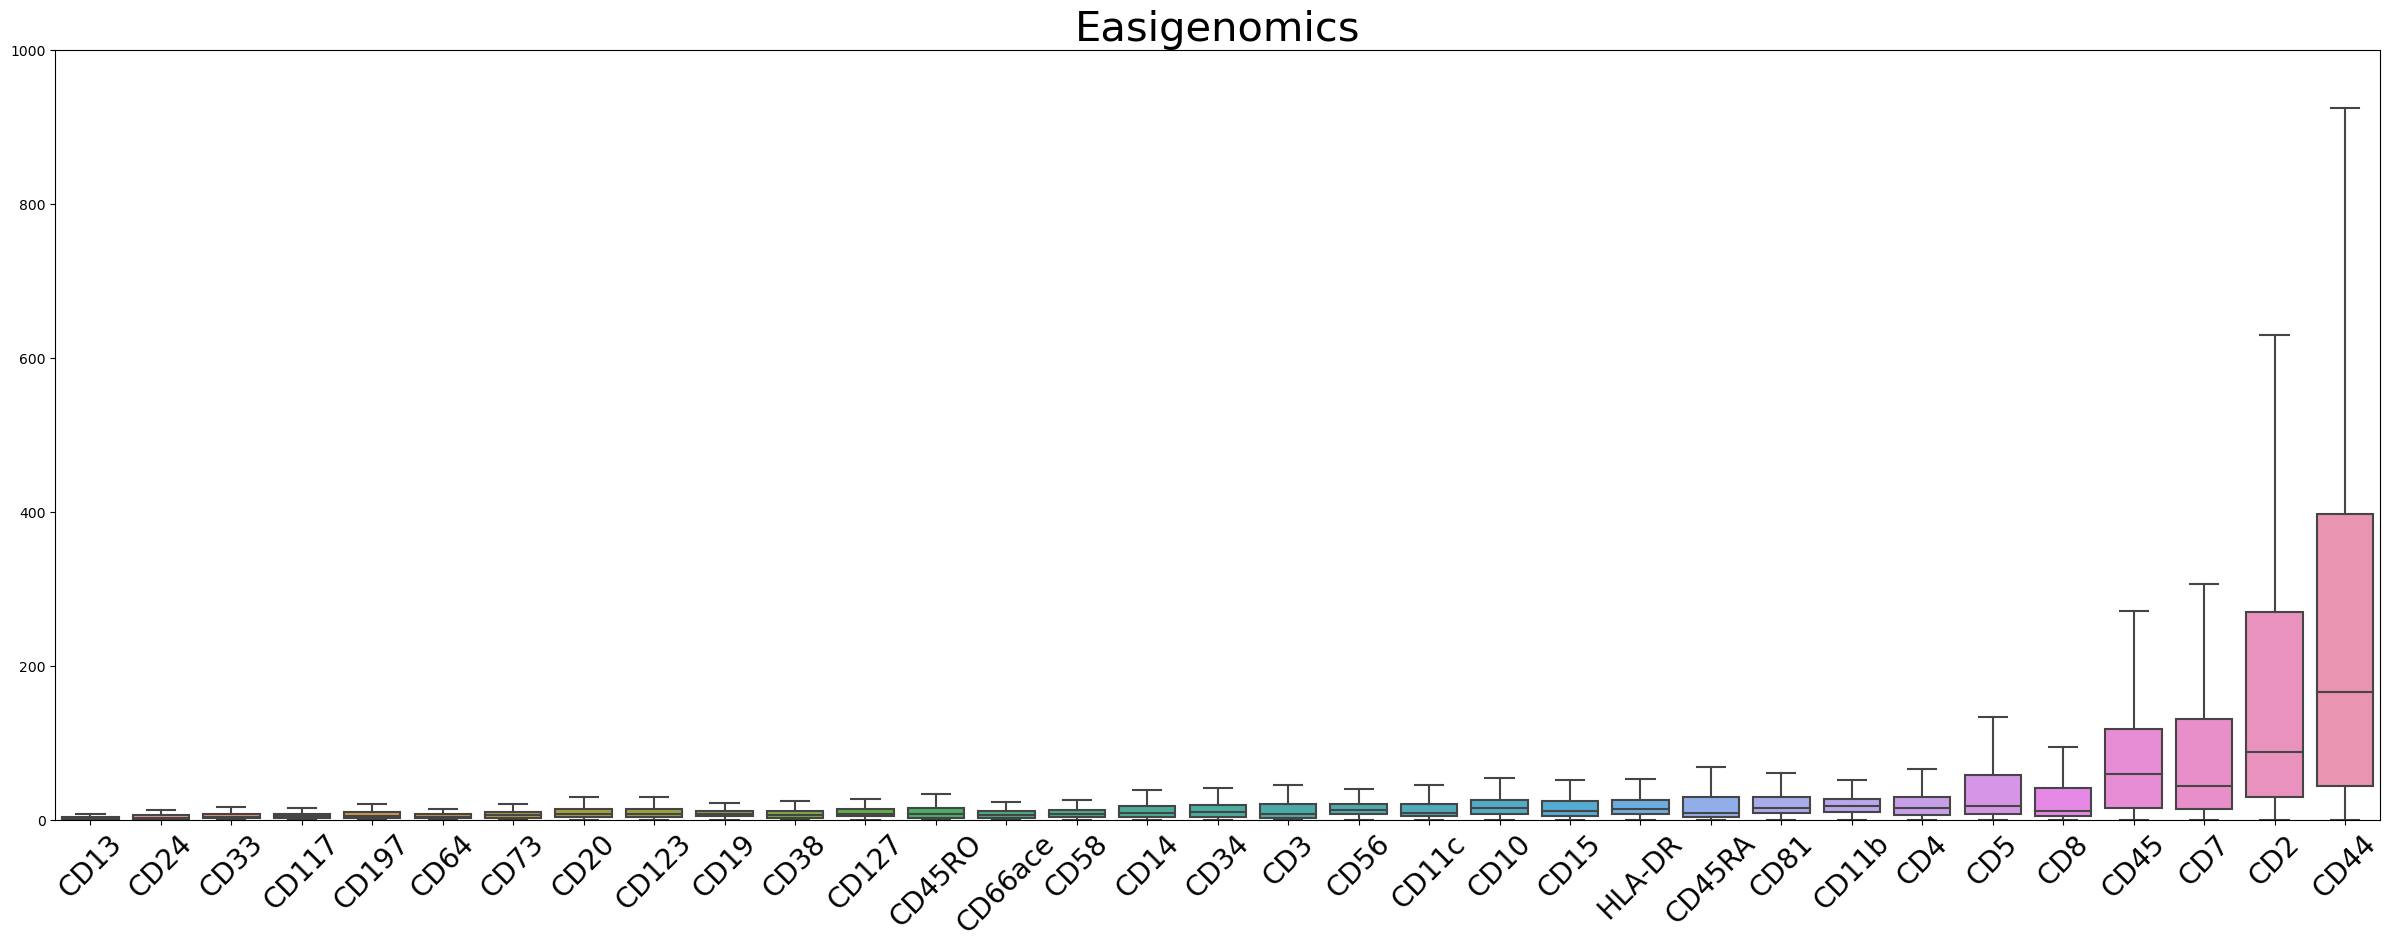

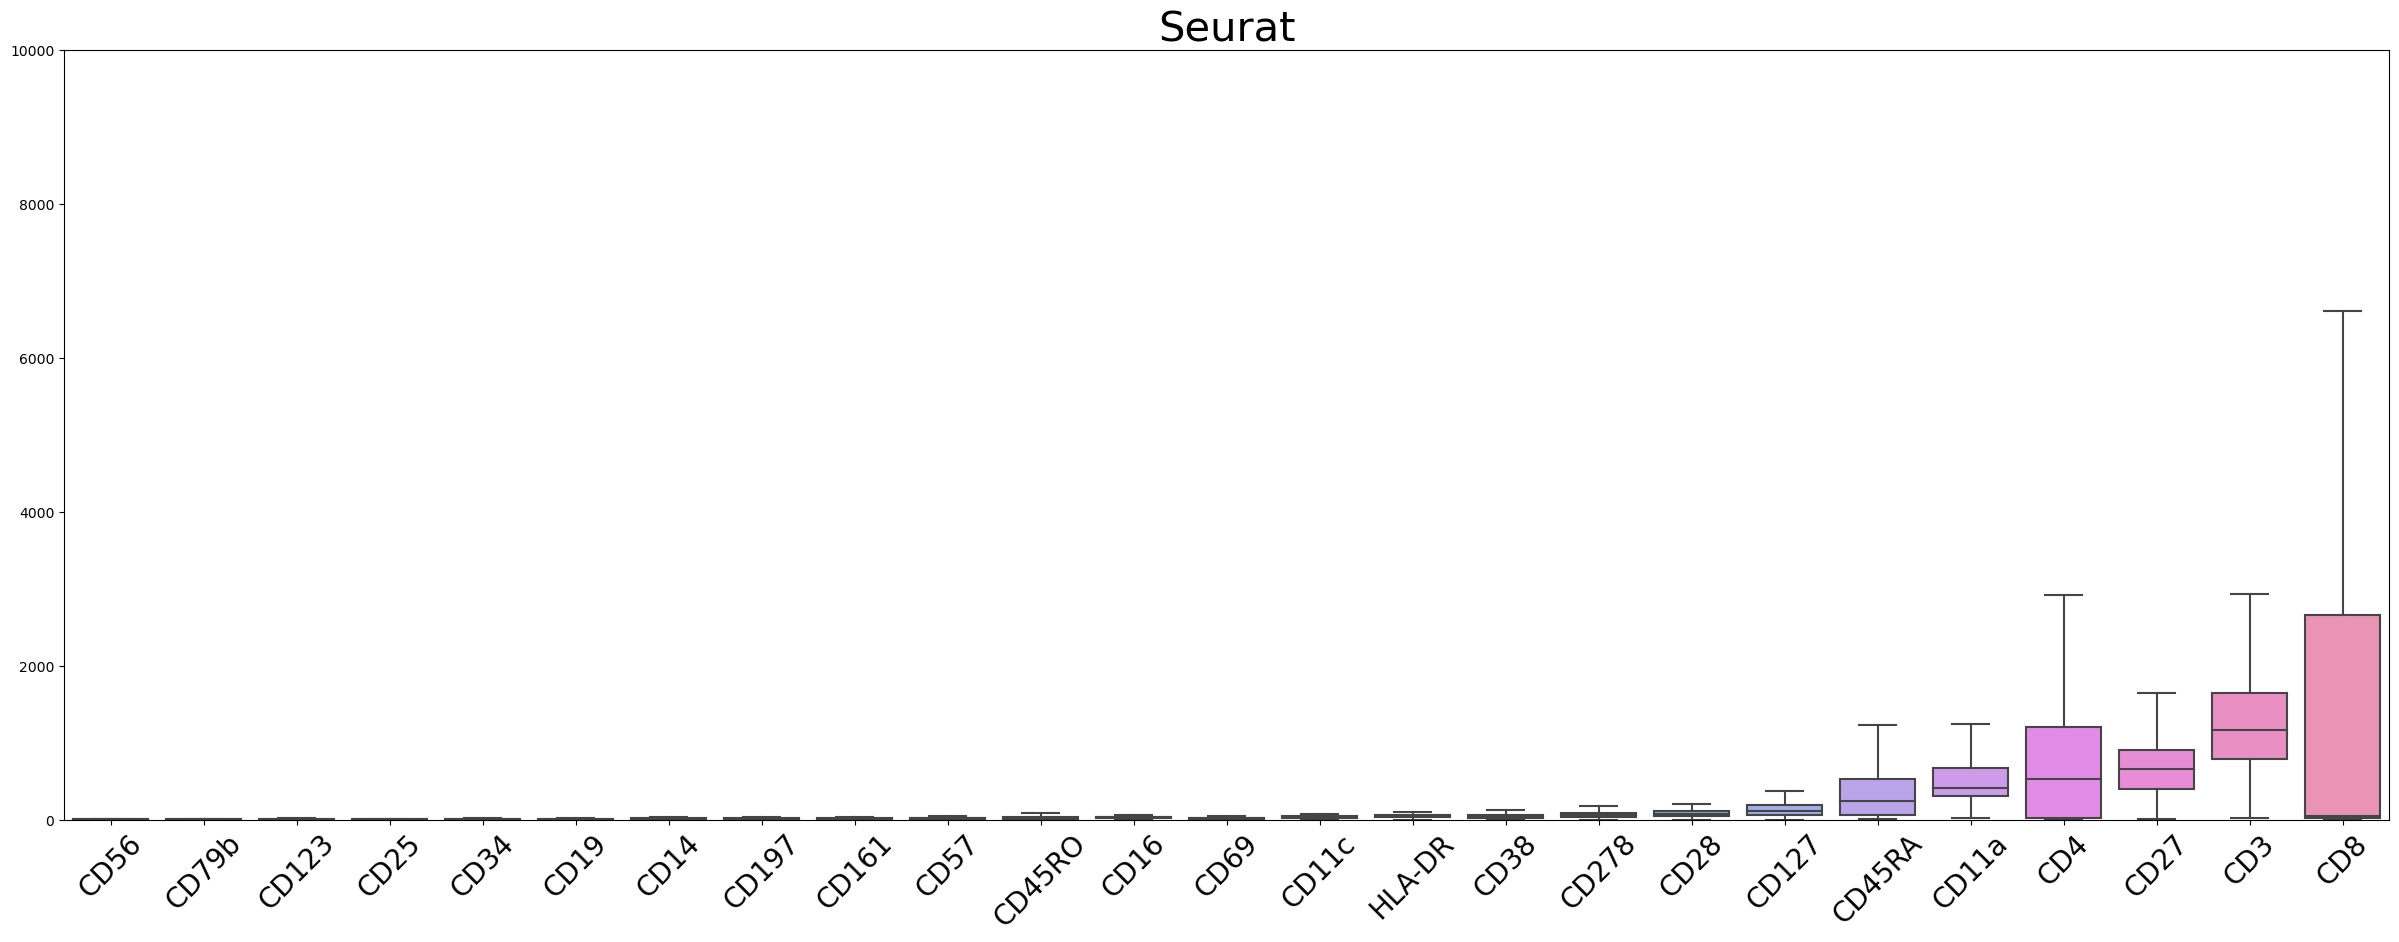

In [45]:
#Neurips top 30
print("In total", len(neurips_tcell), "T-cells in Neurips dataset") 
plt.figure(figsize=(30,10))
plt.ylim(0, 1000)
a=sns.boxplot(data=df_sorted_neurips.iloc[0:26775,104:134],  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("Neurips (Top-30)", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)

#Granja
print("In total", len(granja_tcell), "T-cells in Granja dataset") 
plt.figure(figsize=(30,10))
plt.ylim(0, 10000)
b=sns.boxplot(data=df_sorted_granja,  fliersize=0)

b.set_xticklabels(b.get_xticklabels(),rotation=45)
b.tick_params(axis='x', labelsize=20) 
plt.title("Granja", fontsize=30)

#Easigenomics
print("In total", len(easi_nkt), "NK- and T-cells in Easigenomics dataset") 
plt.figure(figsize=(30,10))
plt.ylim(0, 1000)
c=sns.boxplot(data=df_sorted_easi,  fliersize=0)

c.set_xticklabels(c.get_xticklabels(),rotation=45) 
c.tick_params(axis='x', labelsize=20)
plt.title("Easigenomics", fontsize=30)

#Seurat
print("In total", len(seurat_tcell), "T-cells in Neurips dataset") 
plt.figure(figsize=(30,10))
plt.ylim(0, 10000)
d=sns.boxplot(data=df_sorted_seurat,  fliersize=0)

d.set_xticklabels(d.get_xticklabels(),rotation=45) 
d.tick_params(axis='x', labelsize=20)
plt.title("Seurat", fontsize=30) ;

In total 26775 T-cells in Neurips dataset (log-norm)
In total 4489 T-cells in Granja dataset (log-norm)
In total 27738 NK- and T-cells in Easigenomics dataset (log-norm)
In total 14664 T-cells in Neurips dataset (log-norm)


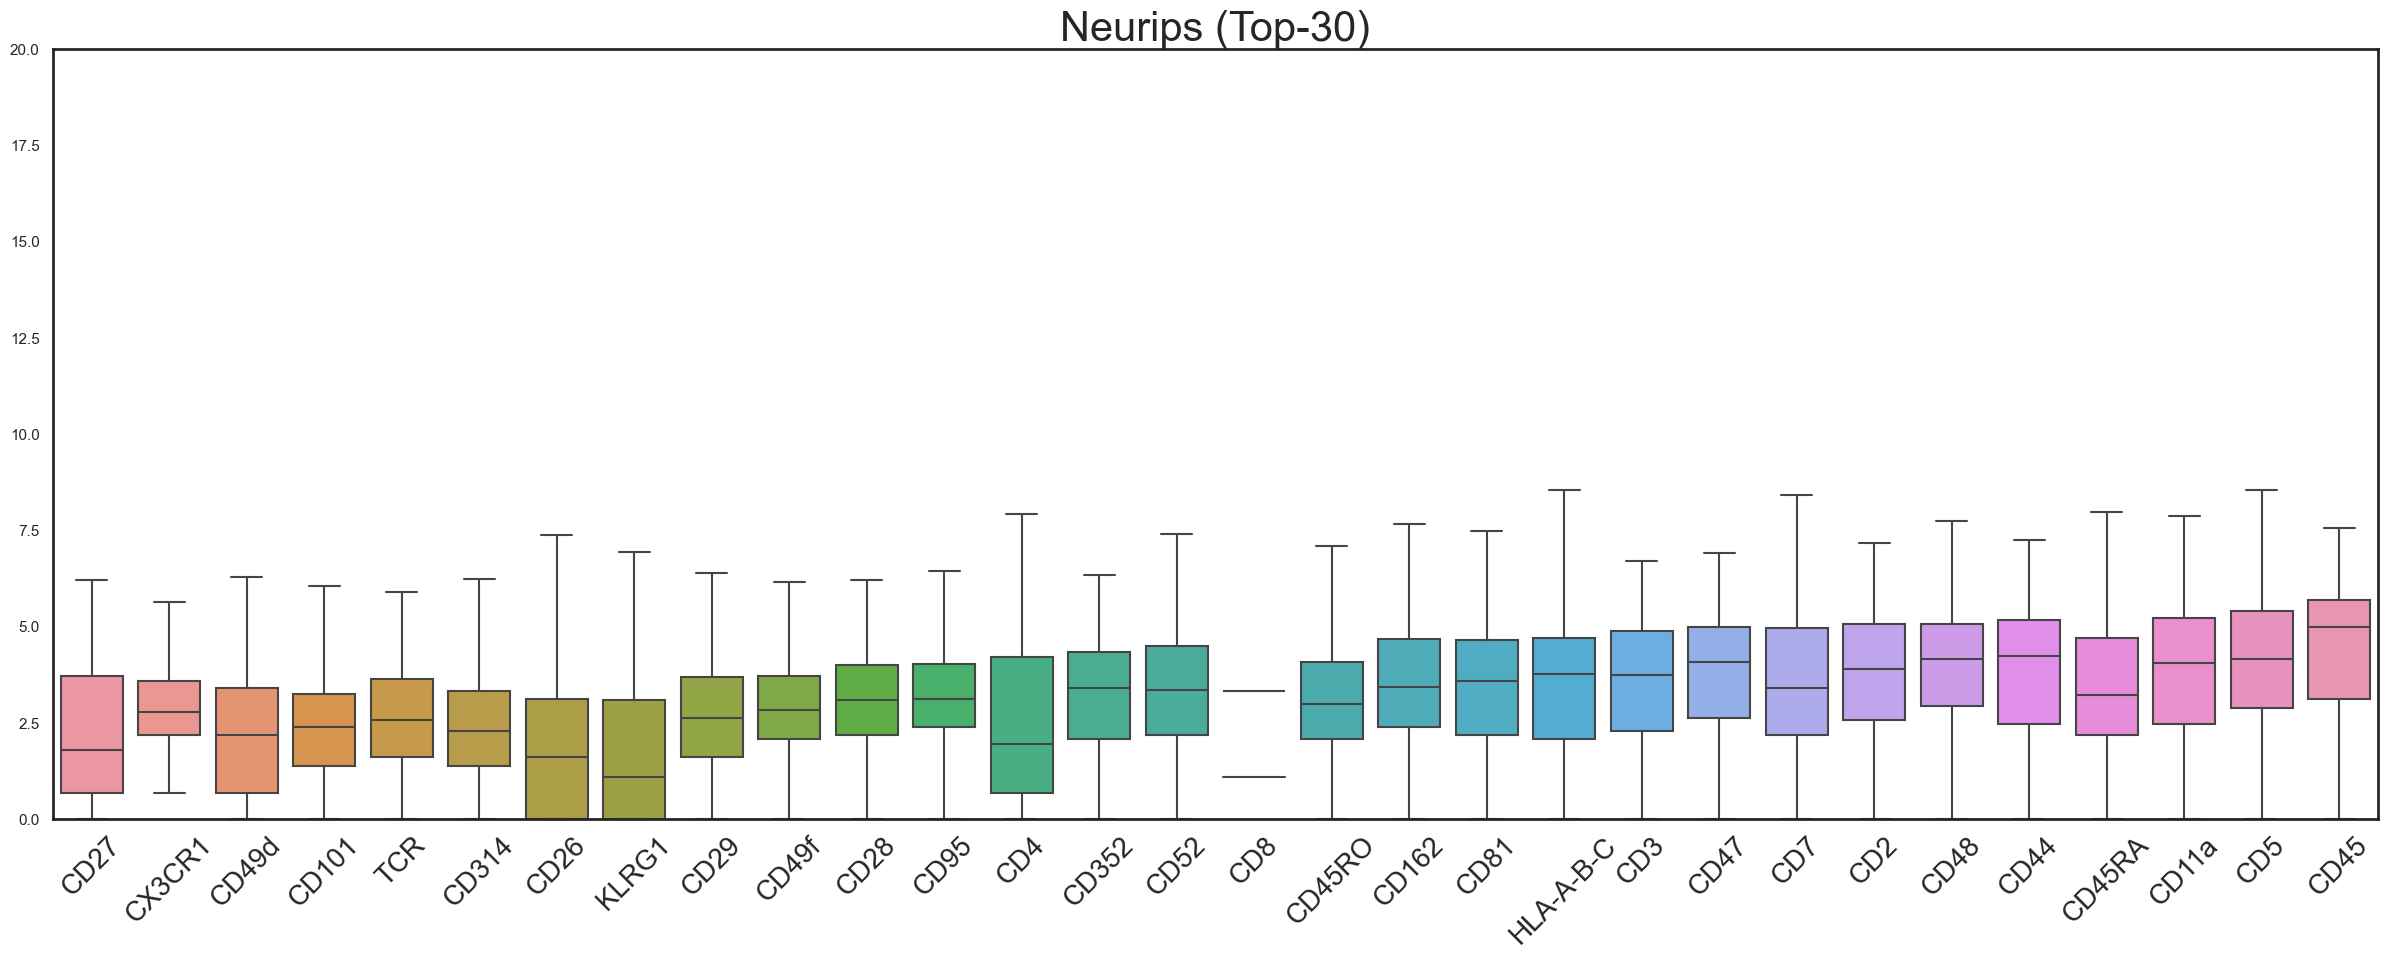

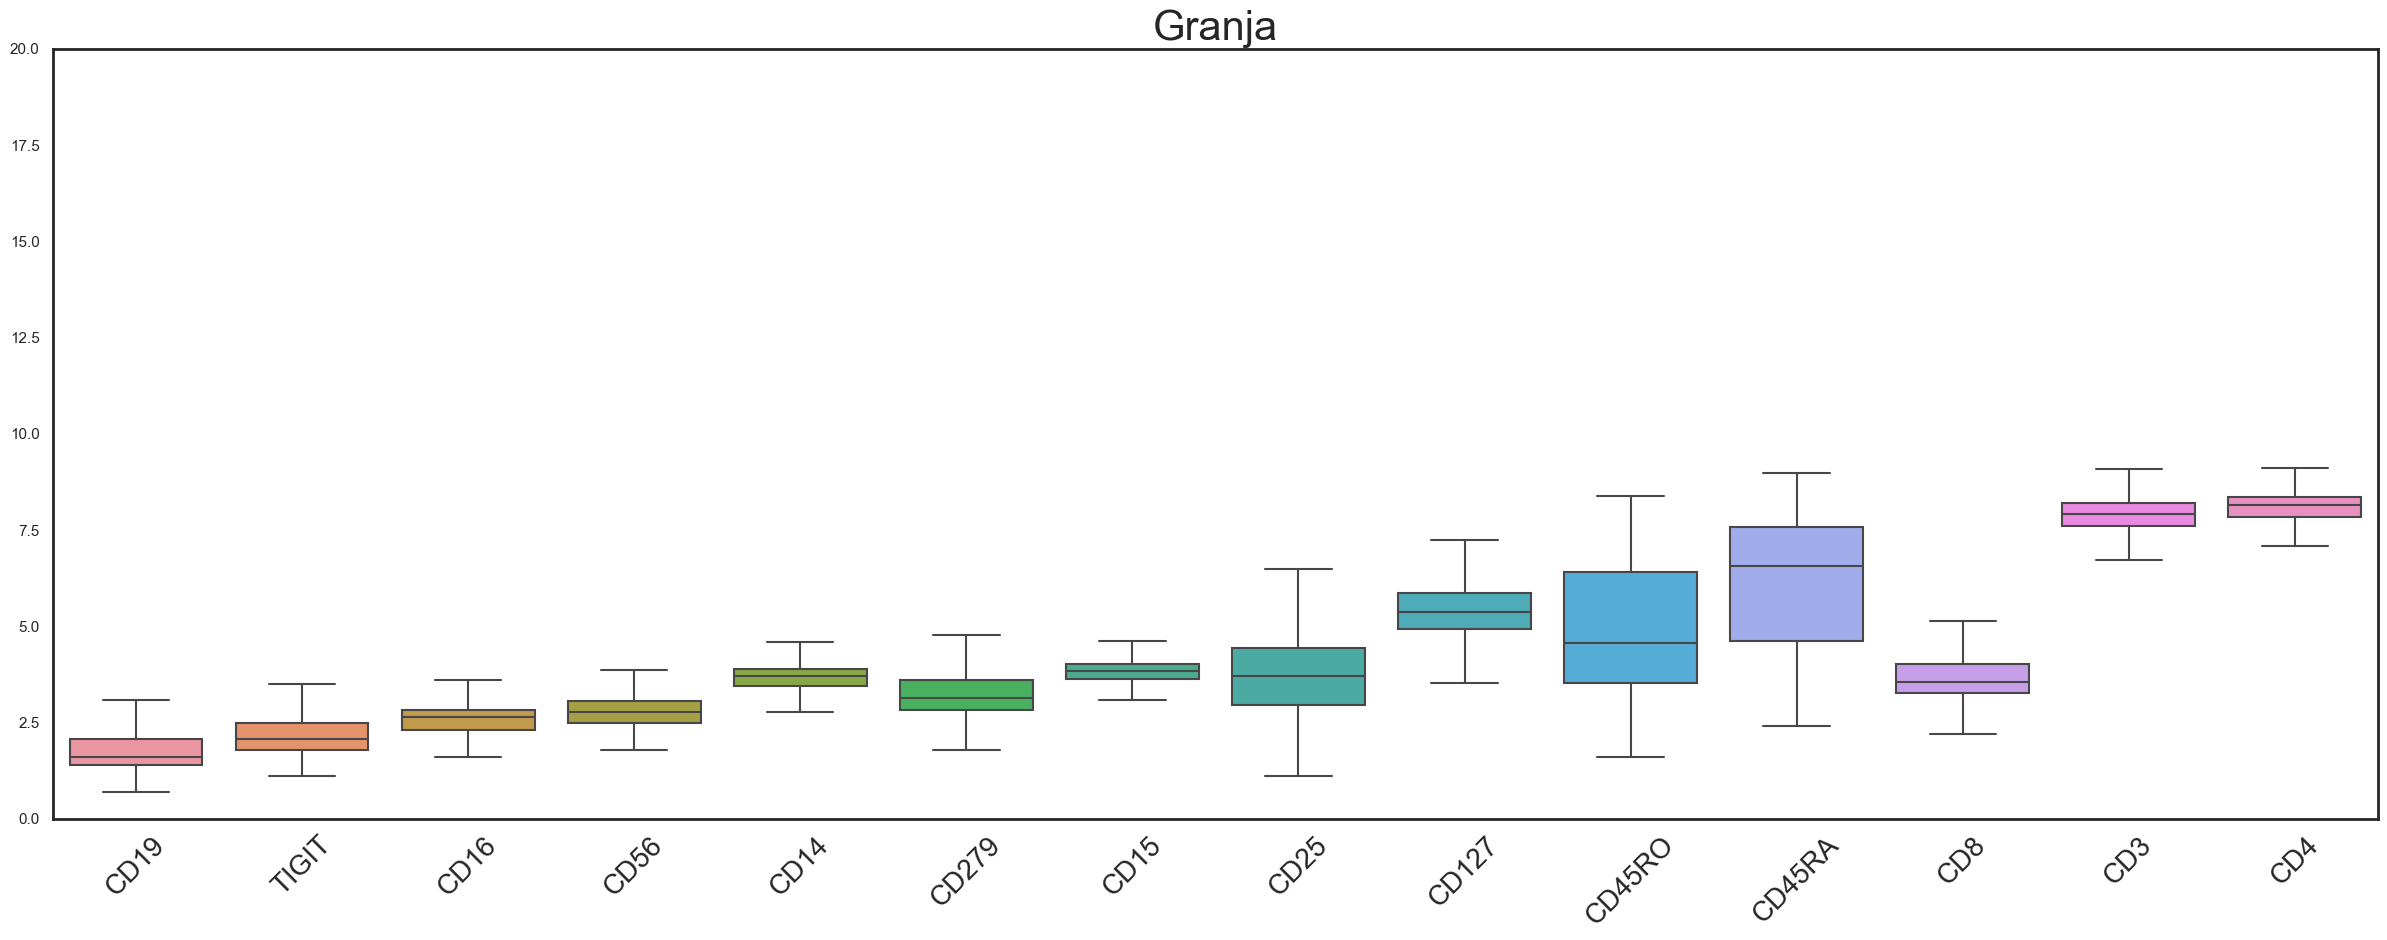

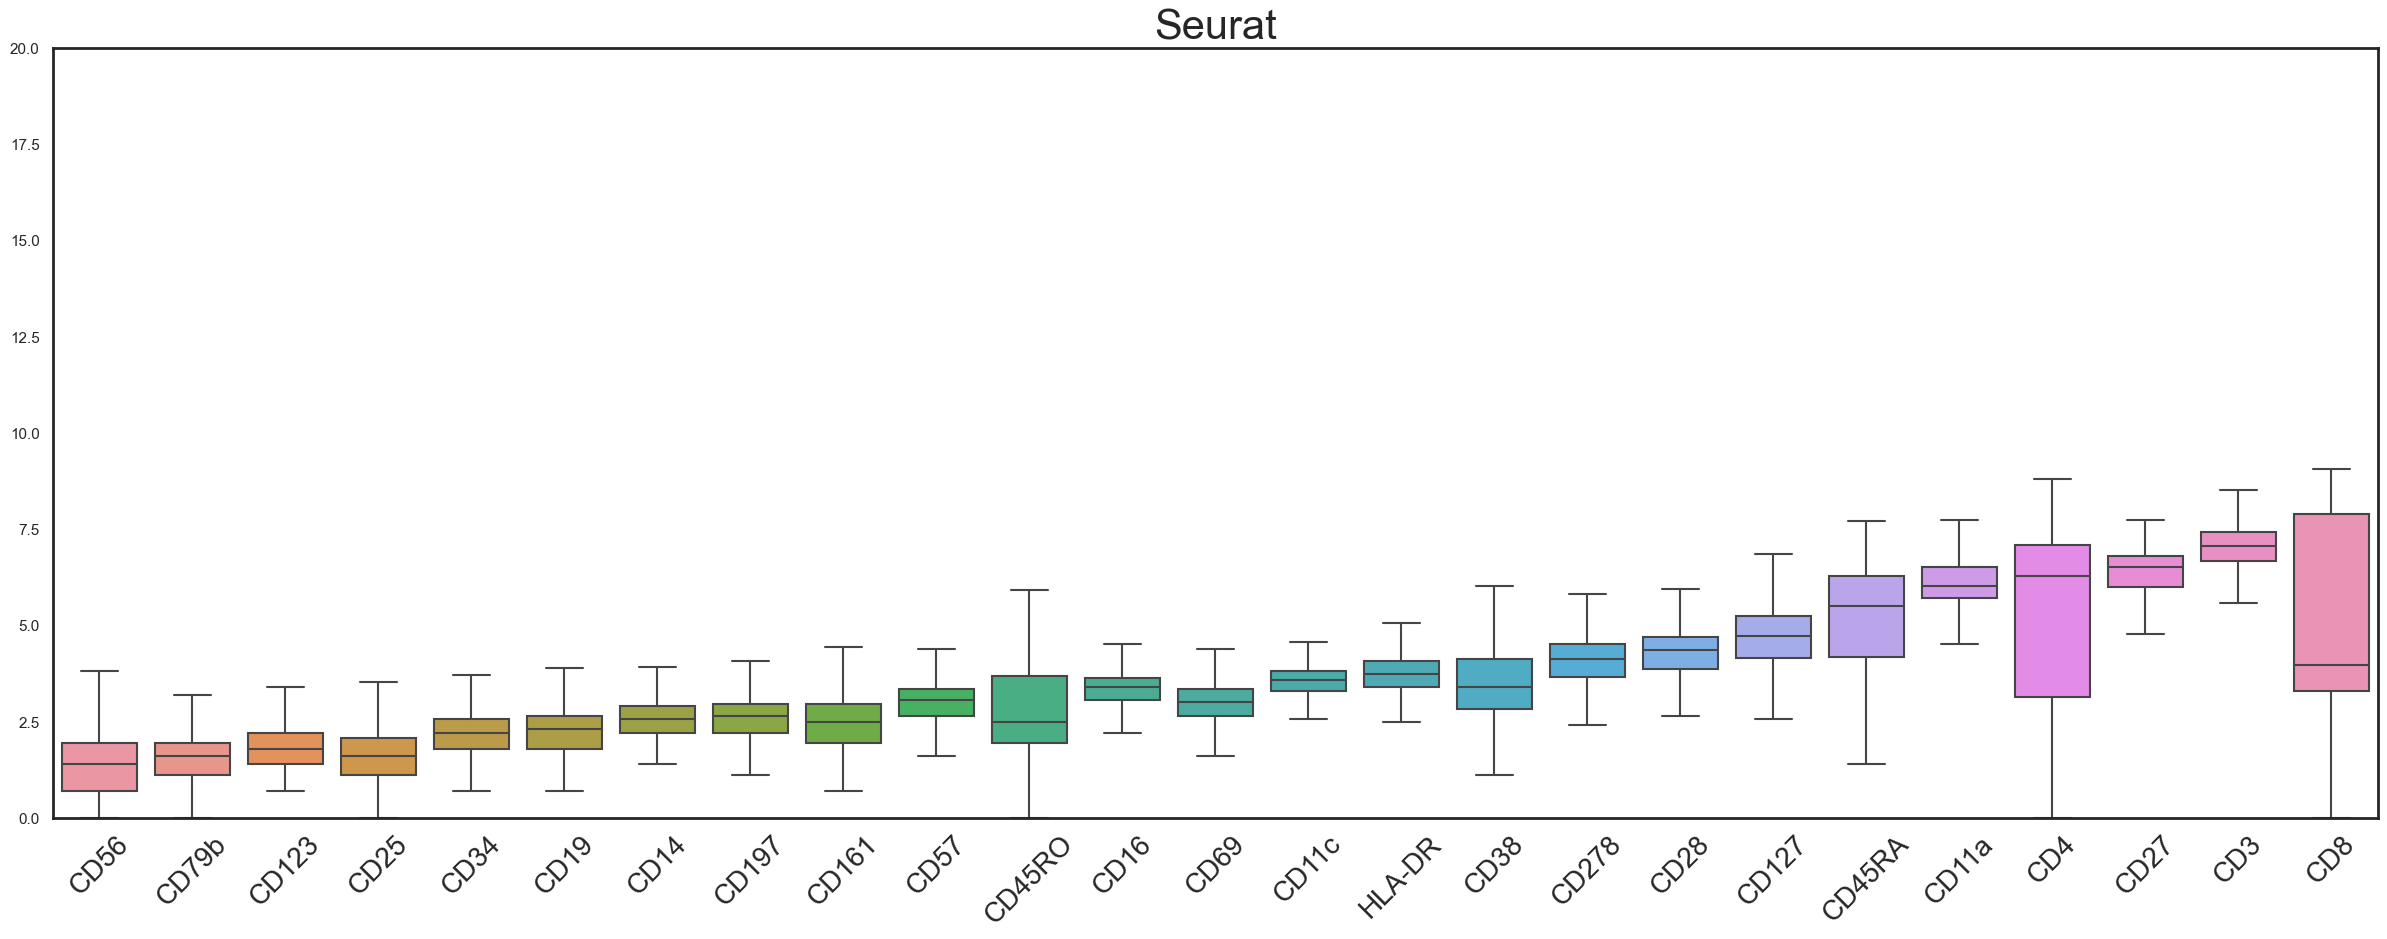

In [193]:
#Log-normalized

#Neurips top 30
print("In total", len(neurips_tcell), "T-cells in Neurips dataset (log-norm)") 
plt.figure(figsize=(30,10))
plt.ylim(0, 20)
a=sns.boxplot(data=np.log(df_sorted_neurips).iloc[0:26775,104:134],  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("Neurips (Top-30)", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)

#Granja
print("In total", len(granja_tcell), "T-cells in Granja dataset (log-norm)") 
plt.figure(figsize=(30,10))
plt.ylim(0, 20)
b=sns.boxplot(data=np.log(df_sorted_granja),  fliersize=0)

b.set_xticklabels(b.get_xticklabels(),rotation=45)
b.tick_params(axis='x', labelsize=20) 
plt.title("Granja", fontsize=30)

#Easigenomics
print("In total", len(easi_nkt), "NK- and T-cells in Easigenomics dataset (log-norm)") 
plt.figure(figsize=(30,10))
plt.ylim(0, 20)
c=sns.boxplot(data=np.log(df_sorted_easi),  fliersize=0)

c.set_xticklabels(c.get_xticklabels(),rotation=45) 
c.tick_params(axis='x', labelsize=20)
plt.title("Easigenomics", fontsize=30)

#Seurat
print("In total", len(seurat_tcell), "T-cells in Neurips dataset (log-norm)") 
plt.figure(figsize=(30,10))
plt.ylim(0, 20)
d=sns.boxplot(data=np.log(df_sorted_seurat),  fliersize=0)

d.set_xticklabels(d.get_xticklabels(),rotation=45) 
d.tick_params(axis='x', labelsize=20)
plt.title("Seurat", fontsize=30) ;

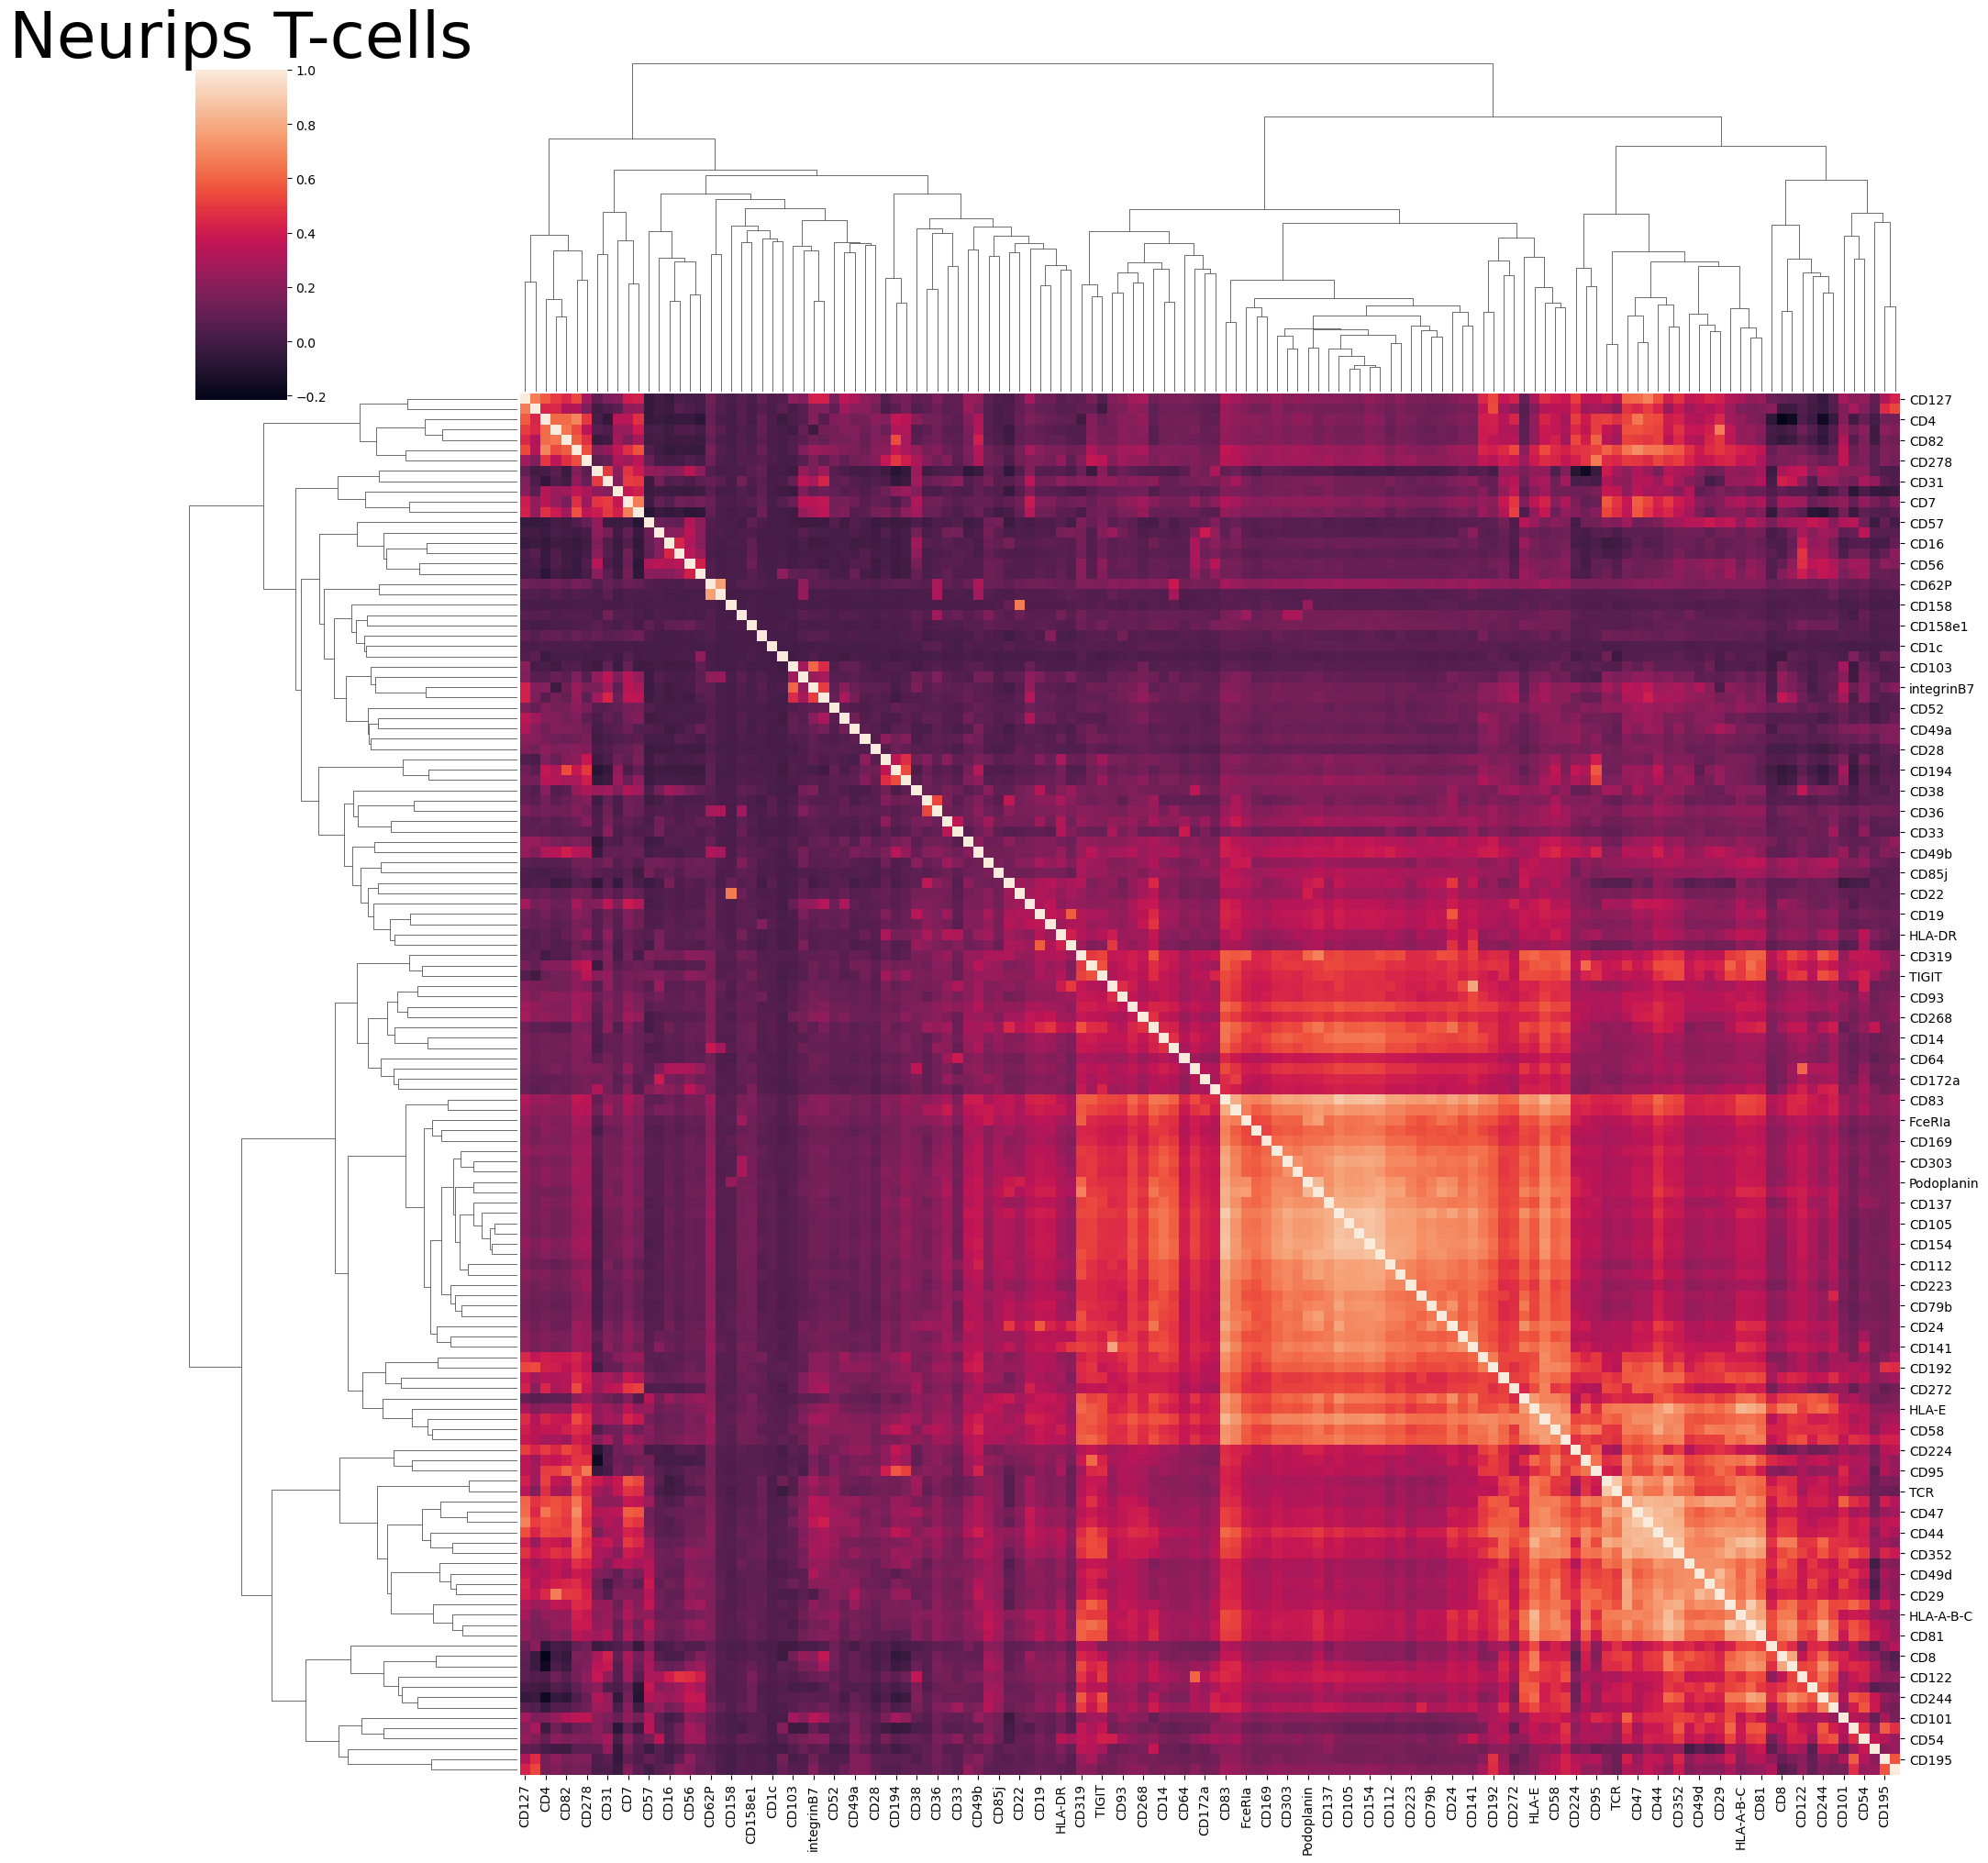

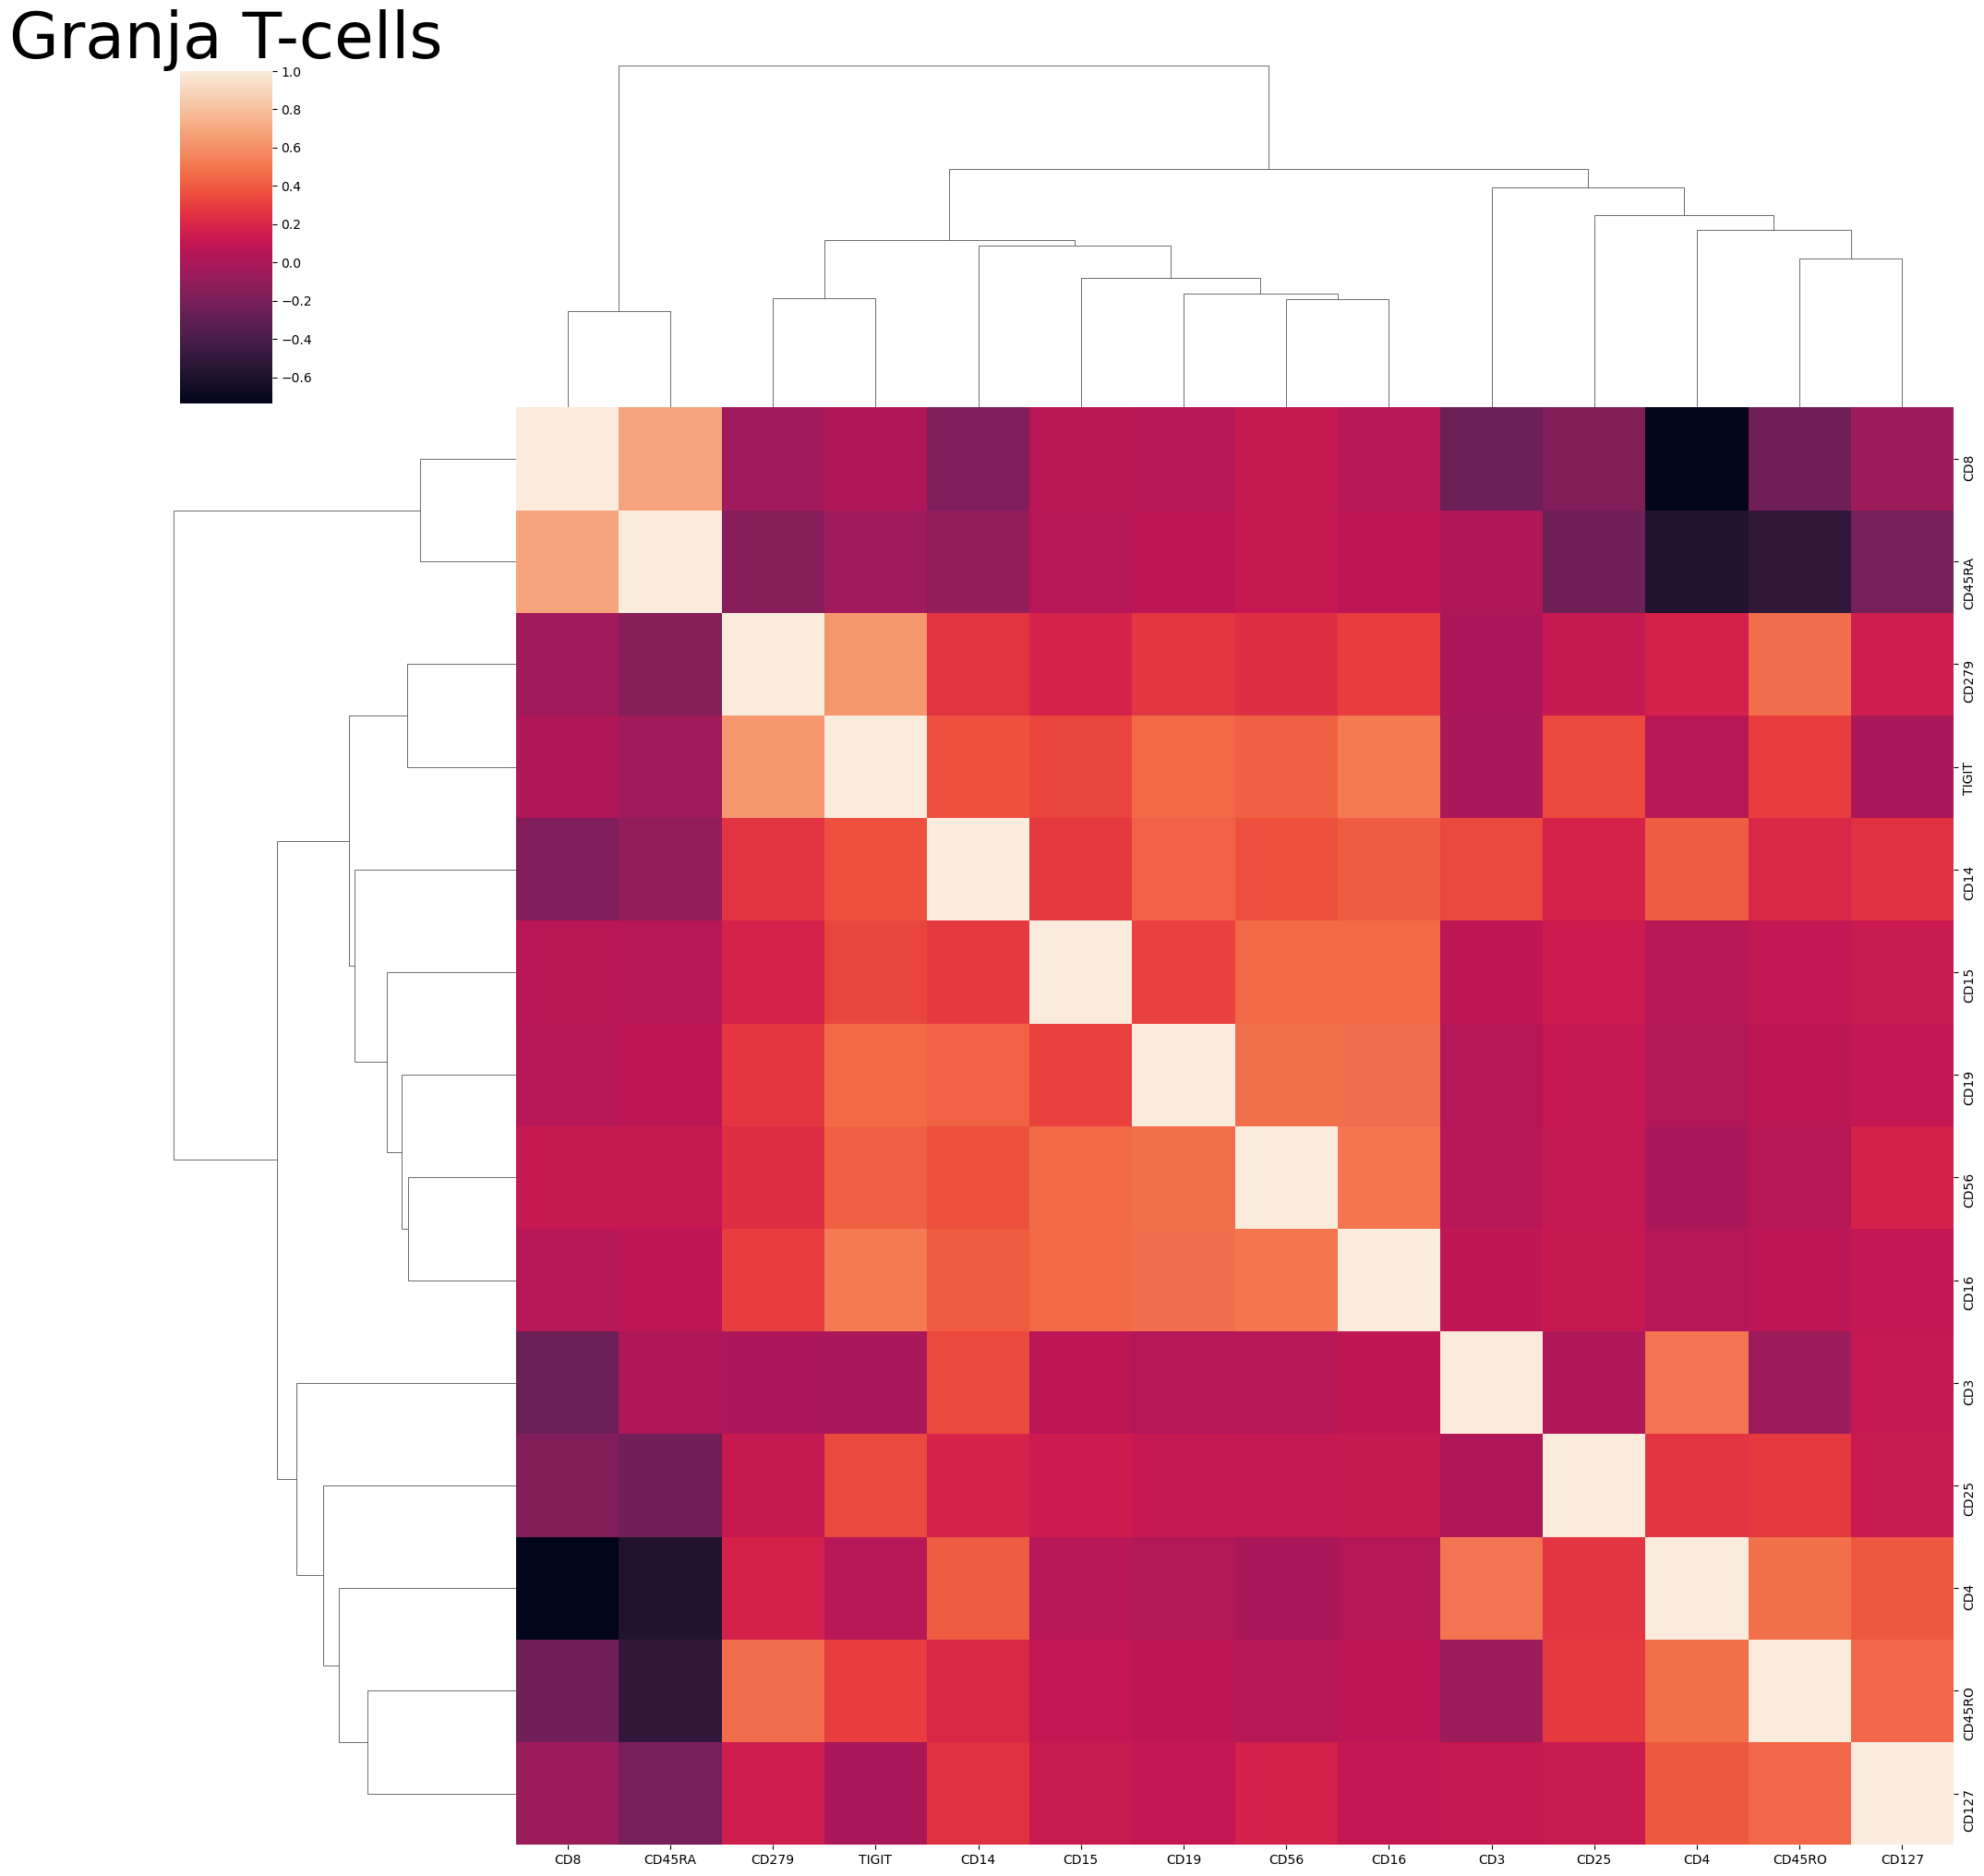

In [46]:
#Neurips
matrix3=neurips_tcell_prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix3, figsize=(20,20))
plt.title('Neurips T-cells', fontsize = 50) ;


#Granja
matrix4=granja_tcell_prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix4, figsize=(20,20))
plt.title('Granja T-cells', fontsize = 50) ;

#Easigenomics
matrix5=easi_nkt_prot.corr(method='pearson', min_periods=1) #NK +T
sns.clustermap(matrix5, figsize=(20,20))
plt.title('Easigenomics T- and NK-cells', fontsize = 50) ;

#Seurat
matrix6=seurat_tcell_prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix6, figsize=(20,20))
plt.title('Seurat T-cells', fontsize = 50) ;


### UMAPS (T-cells)

In [47]:
#Adding protein information to obs for UMAP, Granja
a = granja_tcell.obs
b = granja_tcell_prot

granja_umap_tcell=pd.concat([a, b], axis=1)


granja_tcell.obs=granja_umap_tcell

granja_tcell.obs

cell_type  n_genes  percent_mito  percent_ribo  \
BMMC_D1T1:AAACCCAAGATGCAGC-1  CD4+ T 1     1352           0.0           0.0   
BMMC_D1T1:AAACGAACAGCAGTCC-1  CD4+ T 1     1380           0.0           0.0   
BMMC_D1T1:AAACGAACATGACGAG-1    CD8+ T      993           0.0           0.0   
BMMC_D1T1:AAACGAATCAAGCCAT-1  CD4+ T 1     1416           0.0           0.0   
BMMC_D1T1:AAACGCTAGCCGTAAG-1  CD4+ T 1     1277           0.0           0.0   
...                                ...      ...           ...           ...   
BMMC_D1T2:TTTGGTTGTCTTCATT-1  CD4+ T 1     1476           0.0           0.0   
BMMC_D1T2:TTTGGTTTCACGATCA-1  CD4+ T 1     1241           0.0           0.0   
BMMC_D1T2:TTTGGTTTCCACATAG-1  CD4+ T 1     1226           0.0           0.0   
BMMC_D1T2:TTTGTTGCAGTGGTGA-1    CD8+ T     1004           0.0           0.0   
BMMC_D1T2:TTTGTTGCATGTGTCA-1  CD4+ T 1      951           0.0           0.0   

                              n_counts leiden_r2  leiden_r2_n_genes_MAD_diff  \
BMMC_D1T1:AAACCCAAGATGCAGC-1    2431.0        19                    1.343195   
BMMC_D1T1:AAACGAACAGCAGTCC-1    2783.0         3                    0.075630   
BMMC_D1T1:AAACGAACATGACGAG-1    1899.0         7                    2.400000   
BMMC_D1T1:AAACGAATCAAGCCAT-1    2653.0         3                    0.226891   
BMMC_D1T1:AAACGCTAGCCGTAAG-1    2451.0        13                    1.666667   
...                                ...       ...                         ...   
BMMC_D1T2:TTTGGTTGTCTTCATT-1    2782.0         8                    1.149485   
BMMC_D1T2:TTTGGTTTCACGATCA-1    2256.0         3                    0.981366   
BMMC_D1T2:TTTGGTTTCCACATAG-1    2298.0         4                    0.398625   
BMMC_D1T2:TTTGTTGCAGTGGTGA-1    1660.0         1                    1.010753   
BMMC_D1T2:TTTGTTGCATGTGTCA-1    1630.0         0                    0.500000   

                              leiden_r2_n_counts_MAD_diff  \
BMMC_D1T1:AAACCCAAGATGCAGC-1                     0.485075   
BMMC_D1T1:AAACGAACAGCAGTCC-1                     0.290566   
BMMC_D1T1:AAACGAACATGACGAG-1                     1.789238   
BMMC_D1T1:AAACGAATCAAGCCAT-1                     0.200000   
BMMC_D1T1:AAACGCTAGCCGTAAG-1                     2.240260   
...                                                   ...   
BMMC_D1T2:TTTGGTTGTCTTCATT-1                     0.573427   
BMMC_D1T2:TTTGGTTTCACGATCA-1                     0.590504   
BMMC_D1T2:TTTGGTTTCCACATAG-1                     0.577849   
BMMC_D1T2:TTTGTTGCAGTGGTGA-1                     0.700288   
BMMC_D1T2:TTTGTTGCATGTGTCA-1                     0.754839   

                              leiden_r2_percent_mito_MAD_diff filter  ...  \
BMMC_D1T1:AAACCCAAGATGCAGC-1                              NaN  False  ...   
BMMC_D1T1:AAACGAACAGCAGTCC-1                              NaN  False  ...   
BMMC_D1T1:AAACGAACATGACGAG-1                              NaN  False  ...   
BMMC_D1T1:AAACGAATCAAGCCAT-1                              NaN  False  ...   
BMMC_D1T1:AAACGCTAGCCGTAAG-1                              NaN  False  ...   
...                                                       ...    ...  ...   
BMMC_D1T2:TTTGGTTGTCTTCATT-1                              NaN  False  ...   
BMMC_D1T2:TTTGGTTTCACGATCA-1                              NaN  False  ...   
BMMC_D1T2:TTTGGTTTCCACATAG-1                              NaN  False  ...   
BMMC_D1T2:TTTGTTGCAGTGGTGA-1                              NaN  False  ...   
BMMC_D1T2:TTTGTTGCATGTGTCA-1                              NaN  False  ...   

                             CD45RA   CD4 CD14 CD16 CD25 CD45RO CD279 TIGIT  \
BMMC_D1T1:AAACCCAAGATGCAGC-1     64  4987   38    9   68   1013    39     6   
BMMC_D1T1:AAACGAACAGCAGTCC-1     86  5330   44   15   90    706    24     7   
BMMC_D1T1:AAACGAACATGACGAG-1   3522    29   32   14   18     36    22     9   
BMMC_D1T1:AAACGAATCAAGCCAT-1     71  3494   44   15  233    674    49     6   
BMMC_D1T1:AAACGCTAGCCGTAAG-1    672  3416   34   11   53     72   

In [48]:
#Adding protein information to obs for UMAP, Easigenomics 

a = easi_nkt.obs
b = easi_nkt_prot

easi_umap_nkt=pd.concat([a, b], axis=1)

easi_nkt.obs=easi_umap_nkt

easi_nkt.obs

cell_type  n_genes  percent_mito  percent_ribo  \
AAACCTGAGCCCTAAT-1-100       NKT     1104      0.072933      0.140216   
AAACCTGCAGACGCTC-1-100       NKT     1928      0.035144      0.433632   
AAACCTGTCCTTAATC-1-100       NKT     1750      0.029976      0.421151   
AAACGGGGTCTCTCGT-1-100       NKT     1729      0.069098      0.063340   
AAAGATGTCCAGTAGT-1-100       NKT     2025      0.047019      0.288148   
...                          ...      ...           ...           ...   
TTAGGCACAGAAGCAC-1-158       NKT     1728      0.022962      0.210951   
TTCTACAGTGAGCGAT-1-158       NKT     1734      0.034010      0.263274   
TTGAACGAGCGGATCA-1-158       NKT     1589      0.016802      0.177578   
TTGCCGTAGATCCGAG-1-158       NKT     2140      0.034307      0.258895   
TTTGCGCTCTGTCTCG-1-158       NKT     1910      0.025181      0.165154   

                        n_counts leiden_r2  leiden_r2_n_genes_MAD_diff  \
AAACCTGAGCCCTAAT-1-100    1947.0       NaN                         NaN   
AAACCTGCAGACGCTC-1-100    7142.0       NaN                         NaN   
AAACCTGTCCTTAATC-1-100    5371.0       NaN                         NaN   
AAACGGGGTCTCTCGT-1-100    3126.0       NaN                         NaN   
AAAGATGTCCAGTAGT-1-100    5636.0       NaN                         NaN   
...                          ...       ...                         ...   
TTAGGCACAGAAGCAC-1-158    3963.0       NaN                         NaN   
TTCTACAGTGAGCGAT-1-158    4087.0       NaN                         NaN   
TTGAACGAGCGGATCA-1-158    3452.0       NaN                         NaN   
TTGCCGTAGATCCGAG-1-158    6296.0       NaN                         NaN   
TTTGCGCTCTGTCTCG-1-158    4408.0       NaN                         NaN   

                        leiden_r2_n_counts_MAD_diff  \
AAACCTGAGCCCTAAT-1-100                          NaN   
AAACCTGCAGACGCTC-1-100                          NaN   
AAACCTGTCCTTAATC-1-100                          NaN   
AAACGGGGTCTCTCGT-1-100                          NaN   
AAAGATGTCCAGTAGT-1-100                          NaN   
...                                             ...   
TTAGGCACAGAAGCAC-1-158                          NaN   
TTCTACAGTGAGCGAT-1-158                          NaN   
TTGAACGAGCGGATCA-1-158                          NaN   
TTGCCGTAGATCCGAG-1-158                          NaN   
TTTGCGCTCTGTCTCG-1-158                          NaN   

                        leiden_r2_percent_mito_MAD_diff filter  ... CD38  \
AAACCTGAGCCCTAAT-1-100                              NaN  False  ...   10   
AAACCTGCAGACGCTC-1-100                              NaN  False  ...   16   
AAACCTGTCCTTAATC-1-100                              NaN  False  ...    9   
AAACGGGGTCTCTCGT-1-100                              NaN  False  ...    9   
AAAGATGTCCAGTAGT-1-100                              NaN  False  ...    9   
...                                                 ...    ...  ...  ...   
TTAGGCACAGAAGCAC-1-158                              NaN  False  ...    2   
TTCTACAGTGAGCGAT-1-158                              NaN  False  ...    1   
TTGAACGAGCGGATCA-1-158                              NaN  False  ...    5   
TTGCCGTAGATCCGAG-1-158                              NaN  False  ...    5   
TTTGCGCTCTGTCTCG-1-158                              NaN  False  ...   12   

                       CD127 CD45 CD73 CD197 CD34 CD10 CD15 CD117 CD66ace  
AAACCTGAGCCCTAAT-1-100    14   50    8    17   25   17   43    11      25  
AAACCTGCAGACGCTC-1-100     7  126   18    28   34   12   51    14      21  
AAACCTGTCCTTAATC-1-100    12   66   10    20   27   16   30    10      17  
AAACGGGGTCTCTCGT-1-100    17  109   13    22   21   19   43     7      25  
AAAGATGTCCAGTAGT-1-100    11   96   16    19   22    7   47    14      15  
...                      ...  ...  ...   ...  ...  ...  ...   ...     ...  
TTAGGCACAGAAGCAC-1-158     5   82    6     4   15  105    9     4       4  
TTCTACAGTGAGCGAT-1-158     7   87   12     4   11   68    7     1       7  

In [49]:
#Adding protein information to obs for UMAP, Easigenomics 

a = neurips_tcell.obs
b = neurips_tcell_prot

neurips_umap_tcell=pd.concat([a, b], axis=1)

neurips_tcell.obs=neurips_umap_tcell

In [50]:
#Adding protein information to obs for UMAP, Easigenomics 

a = seurat_tcell.obs
b = seurat_tcell_prot

seurat_umap_tcell=pd.concat([a, b], axis=1)

seurat_tcell.obs=seurat_umap_tcell

In [51]:
#T-cell markers

killer_t= ['CD8']
helper_t = ['CD4']
reg_t = ['CD4','CD127']


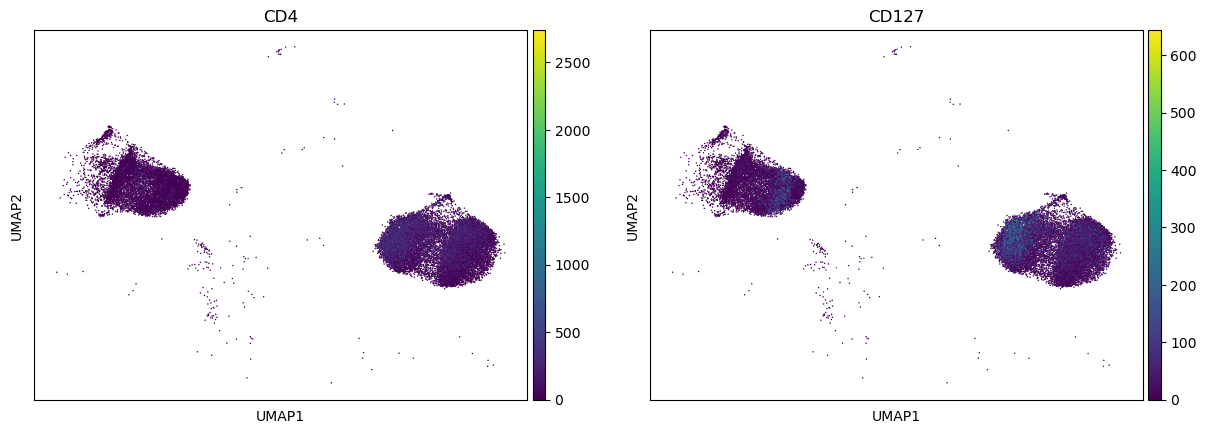

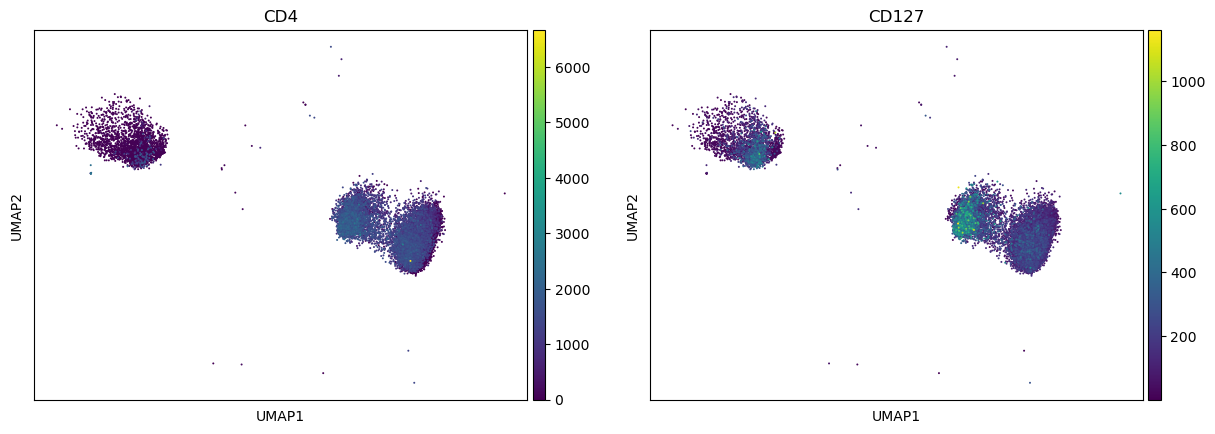

In [52]:
#Regulatory T-cells

sc.pl.umap(granja_tcell, color = reg_t, color_map = 'viridis')

sc.pl.umap(easi_nkt, color = reg_t, color_map = 'viridis')

sc.pl.umap(neurips_tcell, color = reg_t, color_map = 'viridis')

sc.pl.umap(seurat_tcell, color = reg_t, color_map = 'viridis')

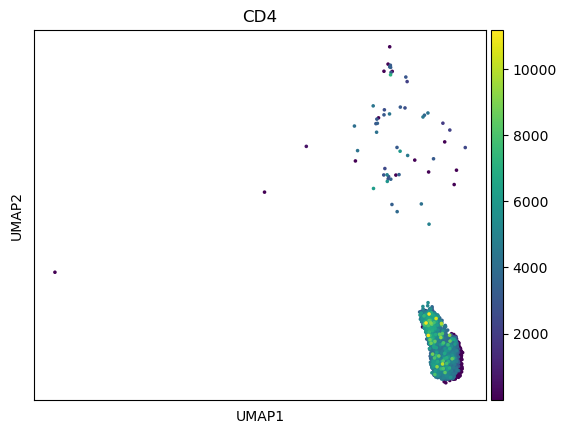

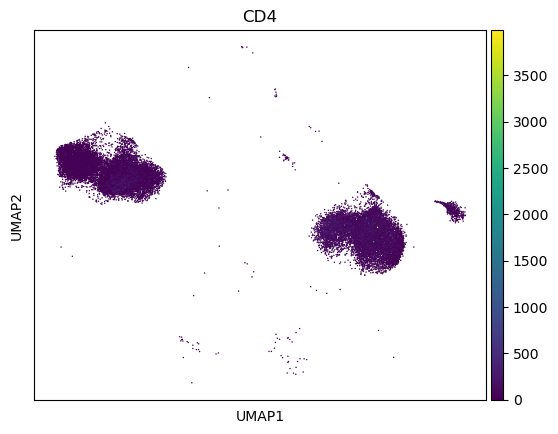

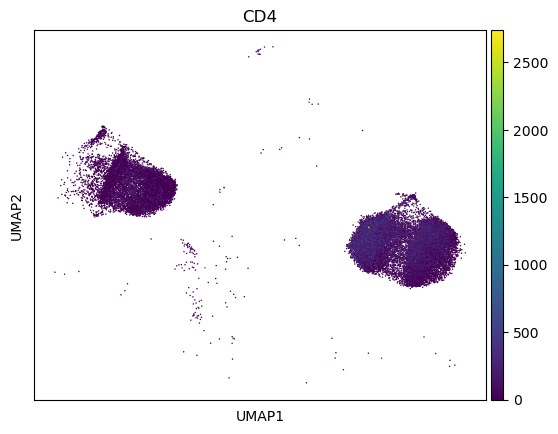

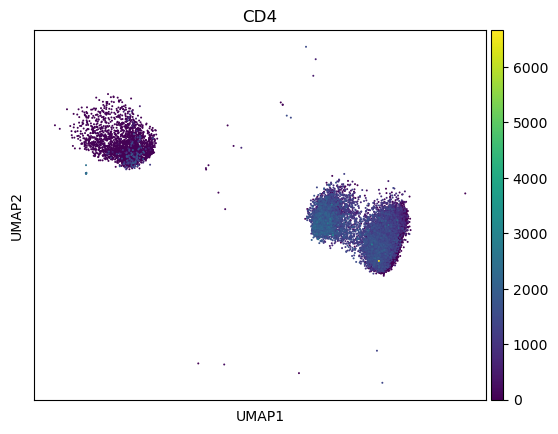

In [53]:
#Helper T-cells

sc.pl.umap(granja_tcell, color = helper_t, color_map = 'viridis')

sc.pl.umap(easi_nkt, color = helper_t, color_map = 'viridis')

sc.pl.umap(neurips_tcell, color = helper_t, color_map = 'viridis')

sc.pl.umap(seurat_tcell, color = helper_t, color_map = 'viridis')

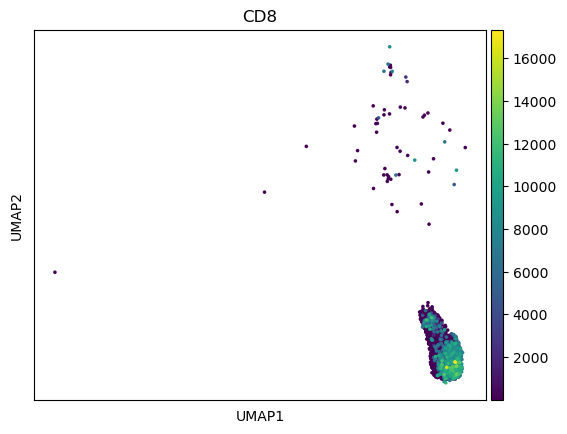

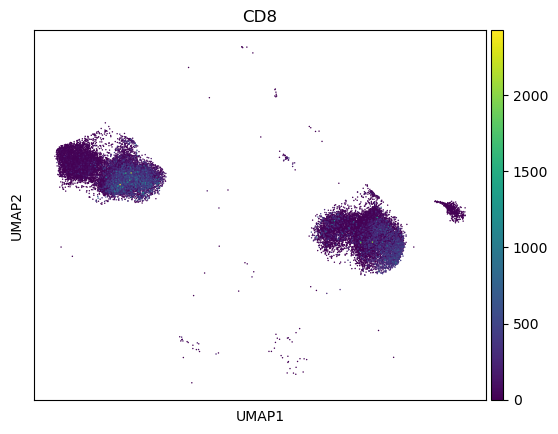

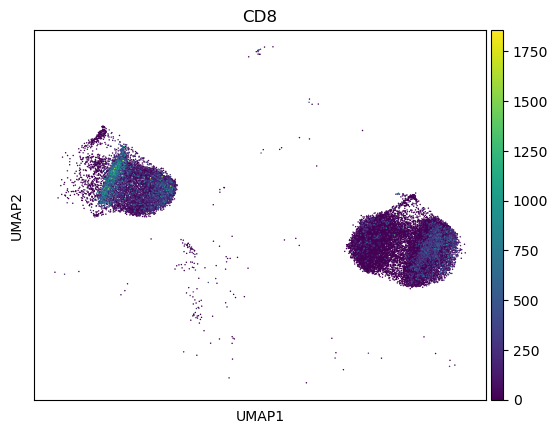

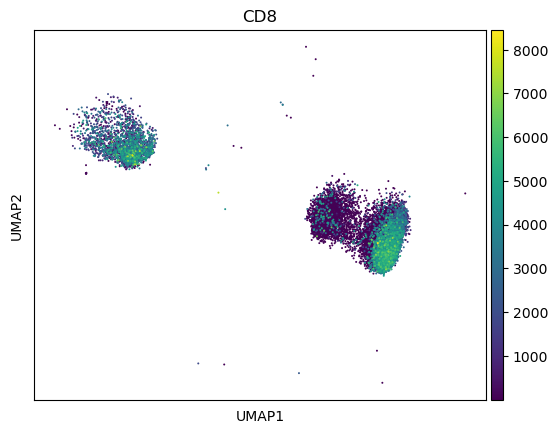

In [54]:
#Killer T-cells

sc.pl.umap(granja_tcell, color = killer_t, color_map = 'viridis')

sc.pl.umap(easi_nkt, color = killer_t, color_map = 'viridis')

sc.pl.umap(neurips_tcell, color = killer_t, color_map = 'viridis')

sc.pl.umap(seurat_tcell, color = killer_t, color_map = 'viridis')



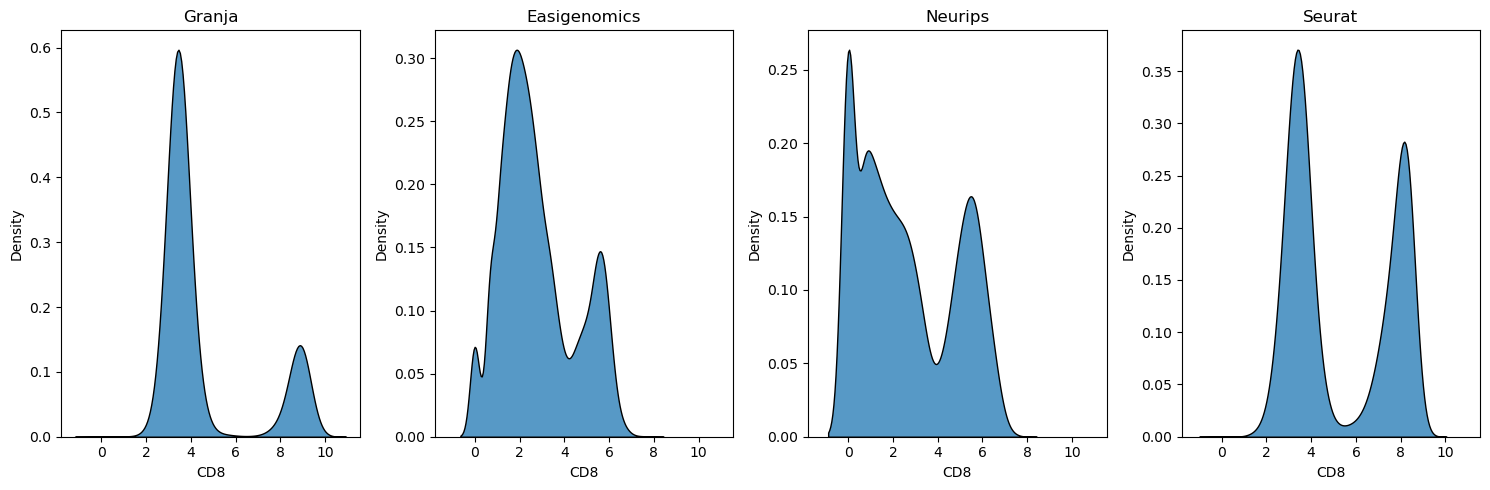

In [58]:
#Killer T-cells, log-normalized 

markers = killer_t

for column_name in markers:
    fig, ax =plt.subplots(1,4 ,tight_layout=True, figsize=(15, 5), sharex=True)
    fig.show()

    ax1 = sns.kdeplot(data=np.log(granja_tcell_prot), x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=np.log(easi_nkt_prot), x=column_name, multiple="stack", ax=ax[1]) ;
    ax3 = sns.kdeplot(data=np.log(neurips_tcell_prot), x=column_name, multiple="stack", ax=ax[2]) ;
    ax4 = sns.kdeplot(data=np.log(seurat_tcell_prot), x=column_name, multiple="stack", ax=ax[3]) ;

    ax1.title.set_text('Granja')    
    ax2.title.set_text('Easigenomics')
    ax3.title.set_text('Neurips')
    ax4.title.set_text('Seurat')
    
    plt.show()

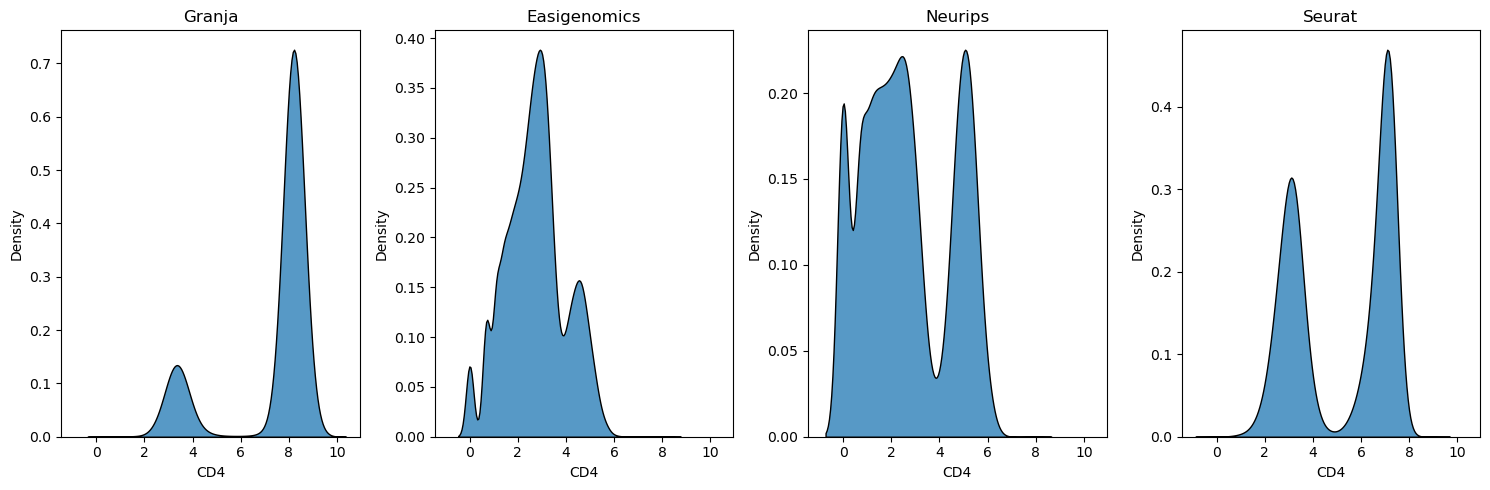

In [59]:
#Helper T-cells, log-normalized

markers = helper_t

for column_name in markers:
    fig, ax =plt.subplots(1,4 ,tight_layout=True, figsize=(15, 5), sharex=True)
    fig.show()

    ax1 = sns.kdeplot(data=np.log(granja_tcell_prot), x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=np.log(easi_nkt_prot), x=column_name, multiple="stack", ax=ax[1]) ;
    ax3 = sns.kdeplot(data=np.log(neurips_tcell_prot), x=column_name, multiple="stack", ax=ax[2]) ;
    ax4 = sns.kdeplot(data=np.log(seurat_tcell_prot), x=column_name, multiple="stack", ax=ax[3]) ;

    ax1.title.set_text('Granja')    
    ax2.title.set_text('Easigenomics')
    ax3.title.set_text('Neurips')
    ax4.title.set_text('Seurat')
    
    plt.show()

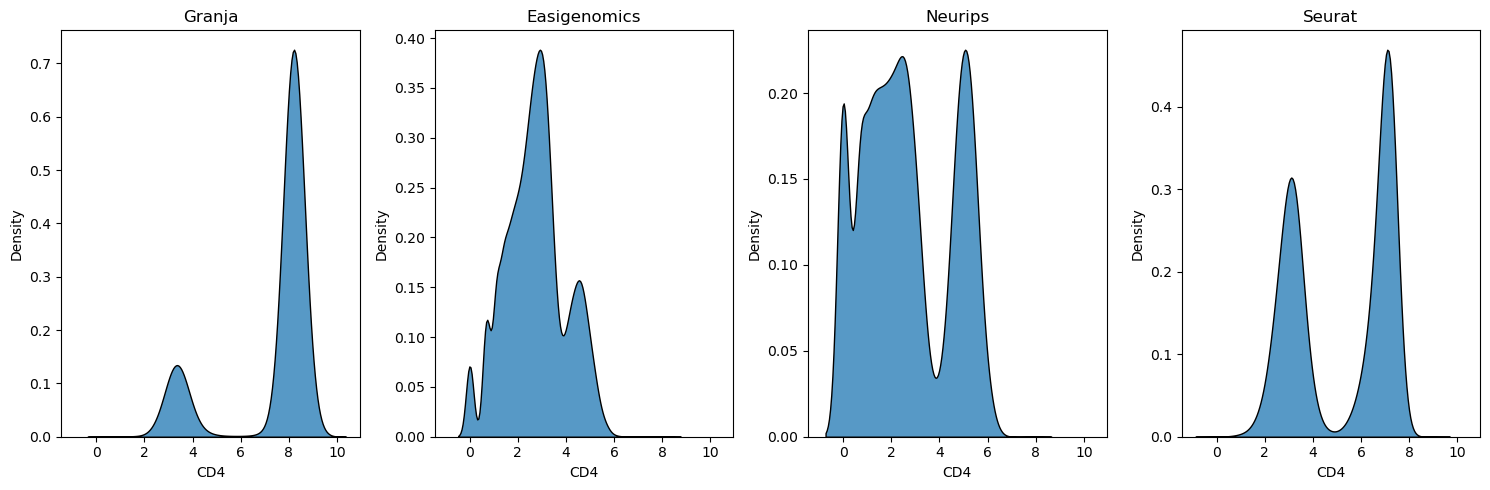

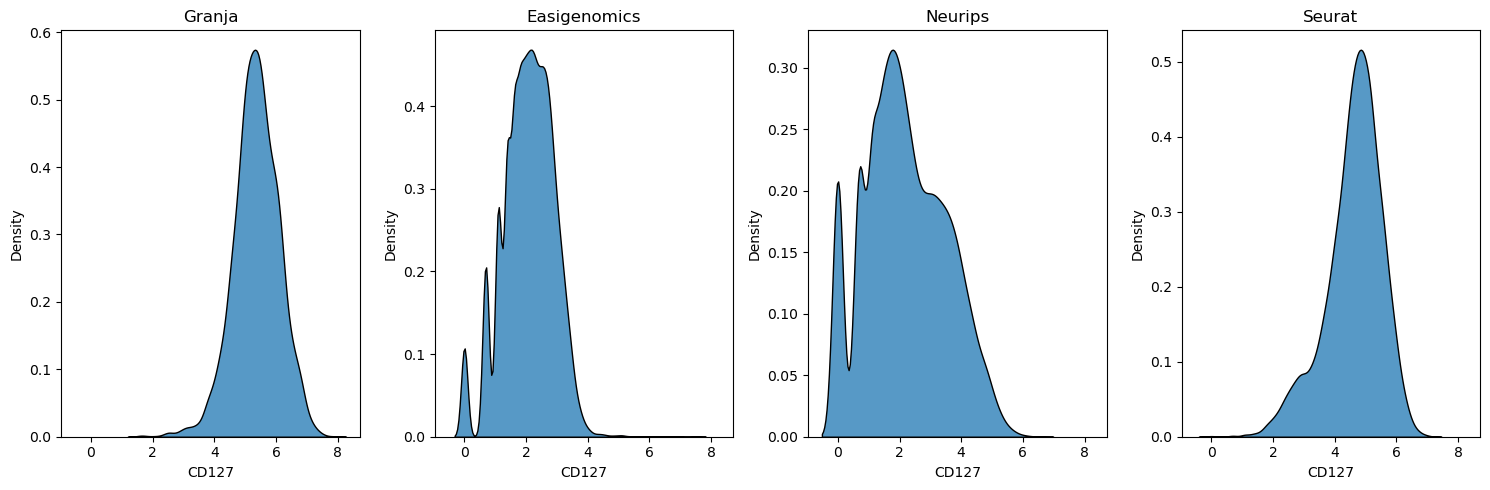

In [61]:
#Regulatory T-cells

markers = reg_t

for column_name in markers:
    fig, ax =plt.subplots(1,4 ,tight_layout=True, figsize=(15, 5), sharex=True)
    fig.show()

    ax1 = sns.kdeplot(data=np.log(granja_tcell_prot), x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=np.log(easi_nkt_prot), x=column_name, multiple="stack", ax=ax[1]) ;
    ax3 = sns.kdeplot(data=np.log(neurips_tcell_prot), x=column_name, multiple="stack", ax=ax[2]) ;
    ax4 = sns.kdeplot(data=np.log(seurat_tcell_prot), x=column_name, multiple="stack", ax=ax[3]) ;

    ax1.title.set_text('Granja')    
    ax2.title.set_text('Easigenomics')
    ax3.title.set_text('Neurips')
    ax4.title.set_text('Seurat')
    
    plt.show()

In [194]:
granja_col=granja_tcell_prot.columns

granja_col

Index(['CD3', 'CD8', 'CD56', 'CD19', 'CD45RA', 'CD4', 'CD14', 'CD16', 'CD25',
       'CD45RO', 'CD279', 'TIGIT', 'CD127', 'CD15'],
      dtype='object')

In [195]:
easi_col=easi_nkt_prot.columns

easi_col

Index(['CD3', 'CD8', 'CD56', 'CD19', 'CD33', 'CD11c', 'CD45RA', 'CD123', 'CD7',
       'CD4', 'CD44', 'CD14', 'CD45RO', 'CD20', 'CD5', 'HLA-DR', 'CD11b',
       'CD64', 'CD58', 'CD24', 'CD13', 'CD2', 'CD81', 'CD38', 'CD127', 'CD45',
       'CD73', 'CD197', 'CD34', 'CD10', 'CD15', 'CD117', 'CD66ace'],
      dtype='object')

In [196]:
neurips_col = neurips_tcell_prot.columns

neurips_col

Index(['CD86', 'CD274', 'CD270', 'CD155', 'CD112', 'CD47', 'CD48', 'CD40',
       'CD154', 'CD52',
       ...
       'CD94', 'CD162', 'CD85j', 'CD23', 'CD328', 'HLA-E', 'CD82', 'CD101',
       'CD88', 'CD224'],
      dtype='object', length=134)

In [197]:
seurat_col=seurat_tcell_prot.columns

seurat_col

Index(['CD3', 'CD8', 'CD56', 'CD19', 'CD11c', 'CD45RA', 'CD123', 'CD4', 'CD14',
       'CD16', 'CD25', 'CD45RO', 'CD69', 'CD161', 'CD27', 'HLA-DR', 'CD57',
       'CD278', 'CD11a', 'CD79b', 'CD28', 'CD38', 'CD127', 'CD197', 'CD34'],
      dtype='object')

In [66]:
#Finding common markers from all lists

markers_all=set(granja_col).intersection(easi_col, neurips_col, seurat_col)

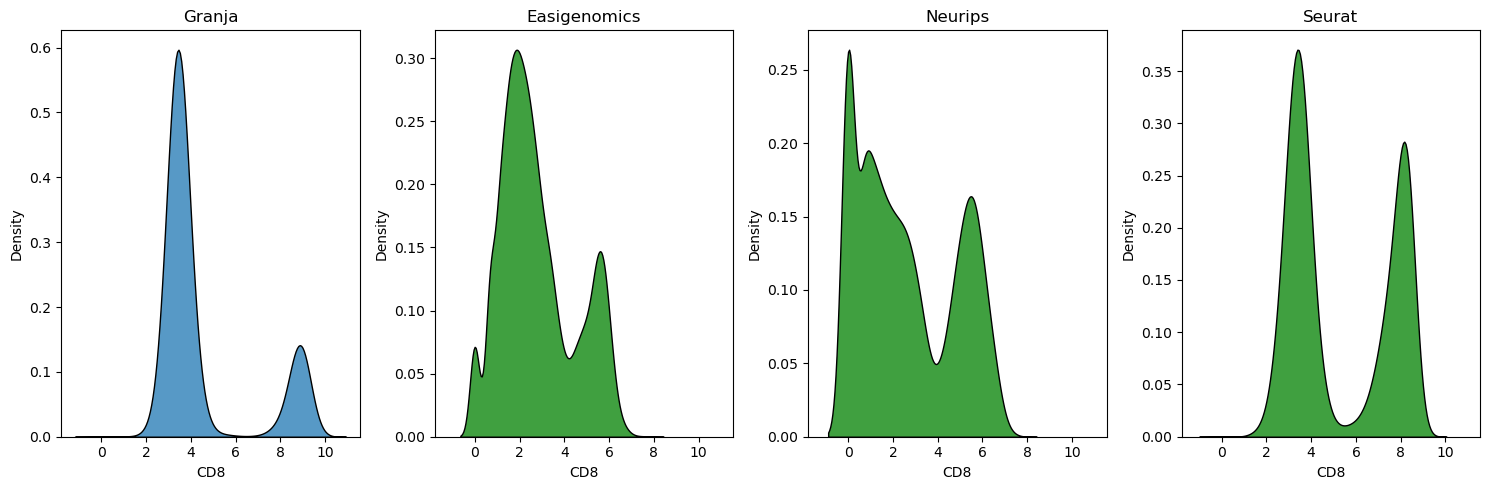

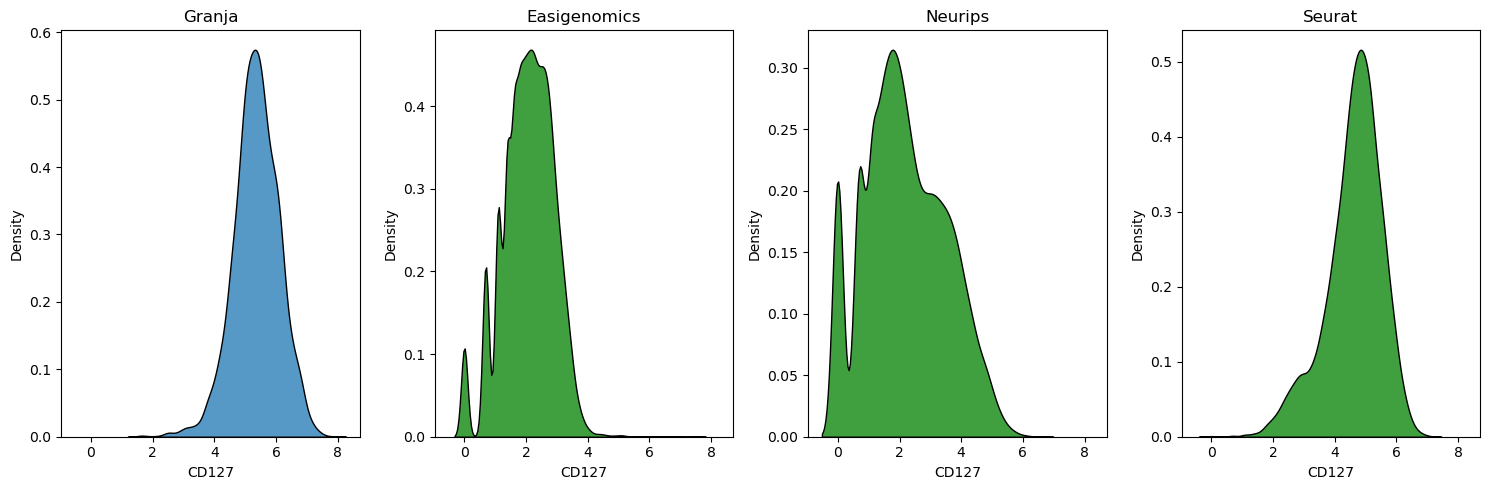

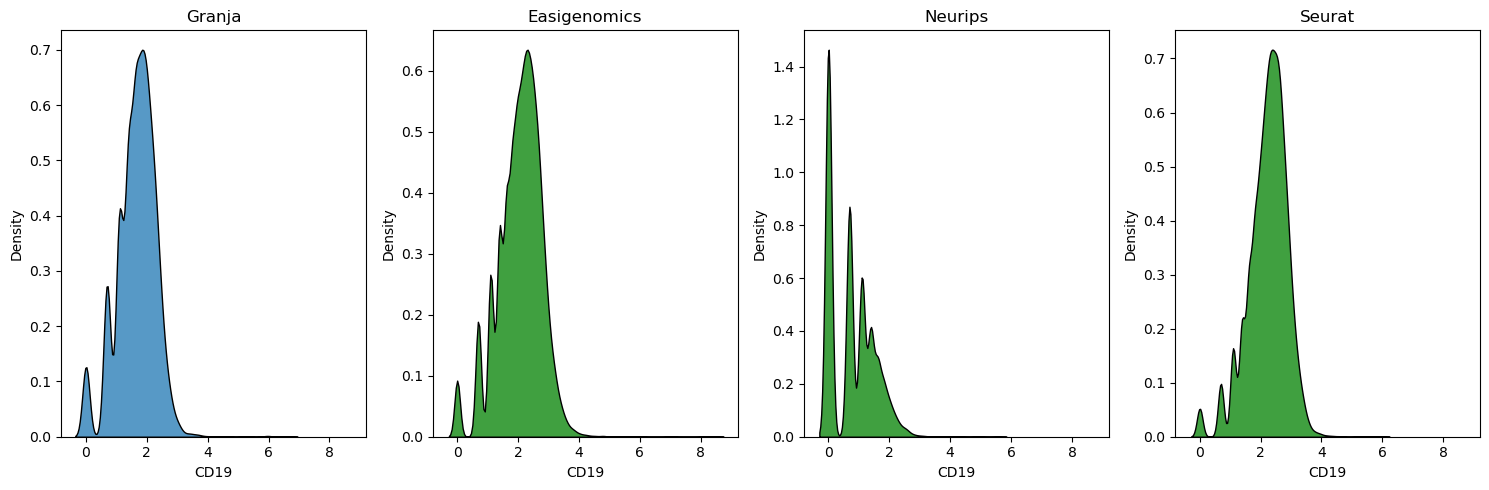

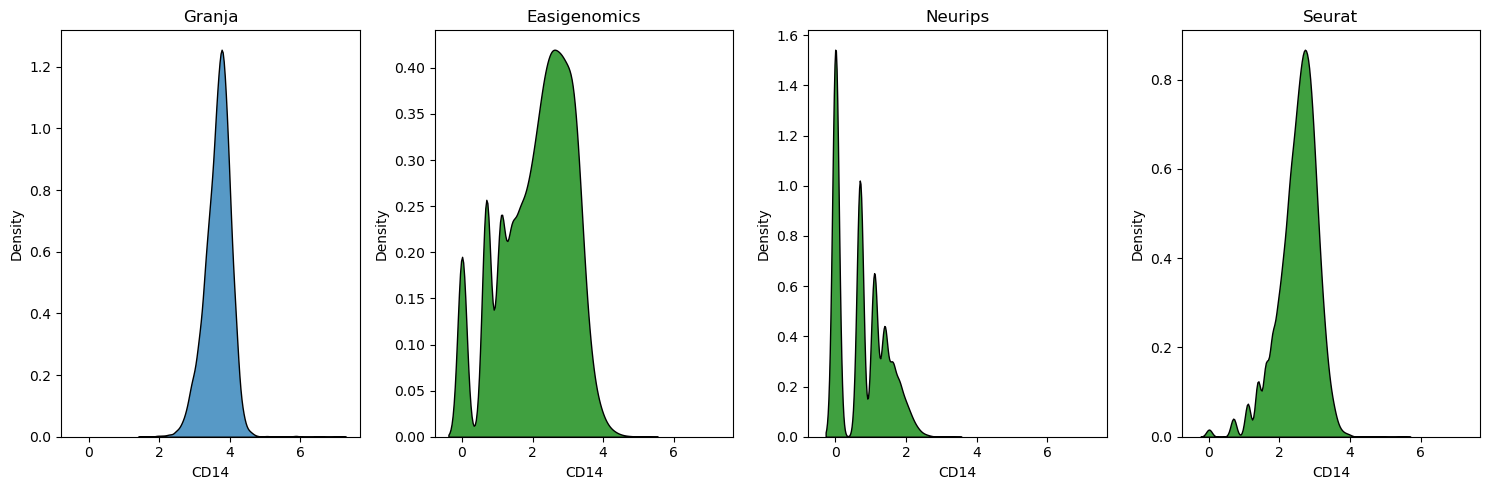

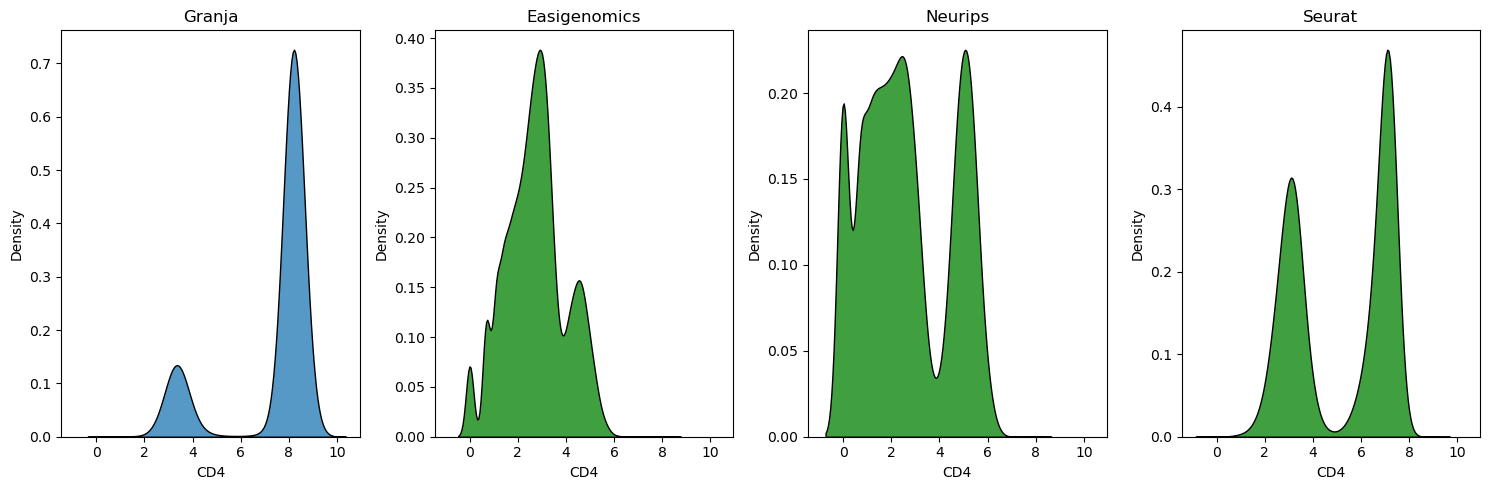

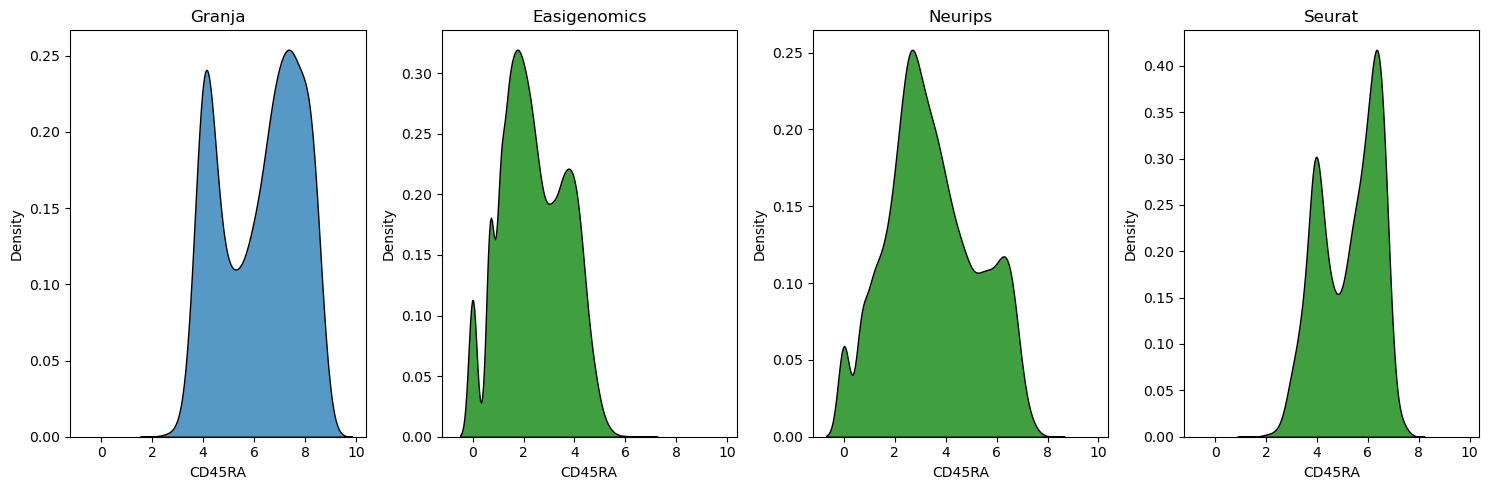

In [69]:
#All markers that are common between datasets, shared x-axis, log-normalized
markers = markers_all

for column_name in markers:
    fig, ax =plt.subplots(1,4 ,tight_layout=True, figsize=(15, 5), sharex=True)
    fig.show()

    ax1 = sns.kdeplot(data=np.log(granja_tcell_prot), x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=np.log(easi_nkt_prot), x=column_name, multiple="stack", color="g", ax=ax[1]) ;
    ax3 = sns.kdeplot(data=np.log(neurips_tcell_prot), x=column_name, multiple="stack", color="g", ax=ax[2]) ;
    ax4 = sns.kdeplot(data=np.log(seurat_tcell_prot), x=column_name, multiple="stack", color="g", ax=ax[3]) ;

    ax1.title.set_text('Granja')    
    ax2.title.set_text('Easigenomics')
    ax3.title.set_text('Neurips')
    ax4.title.set_text('Seurat')
    
    plt.show()

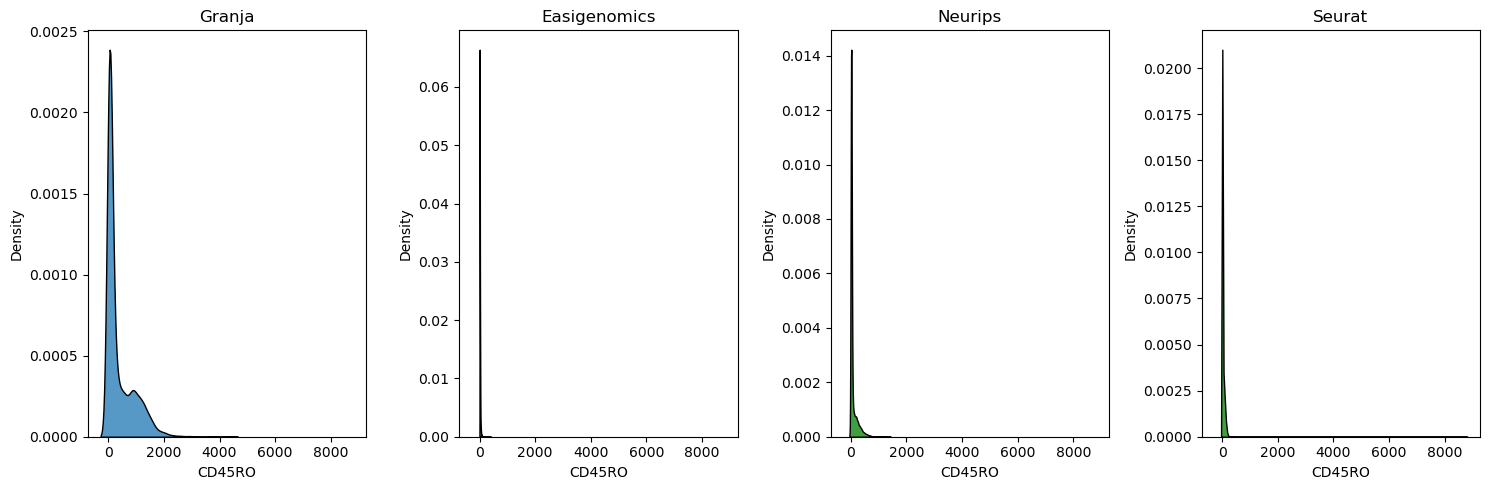

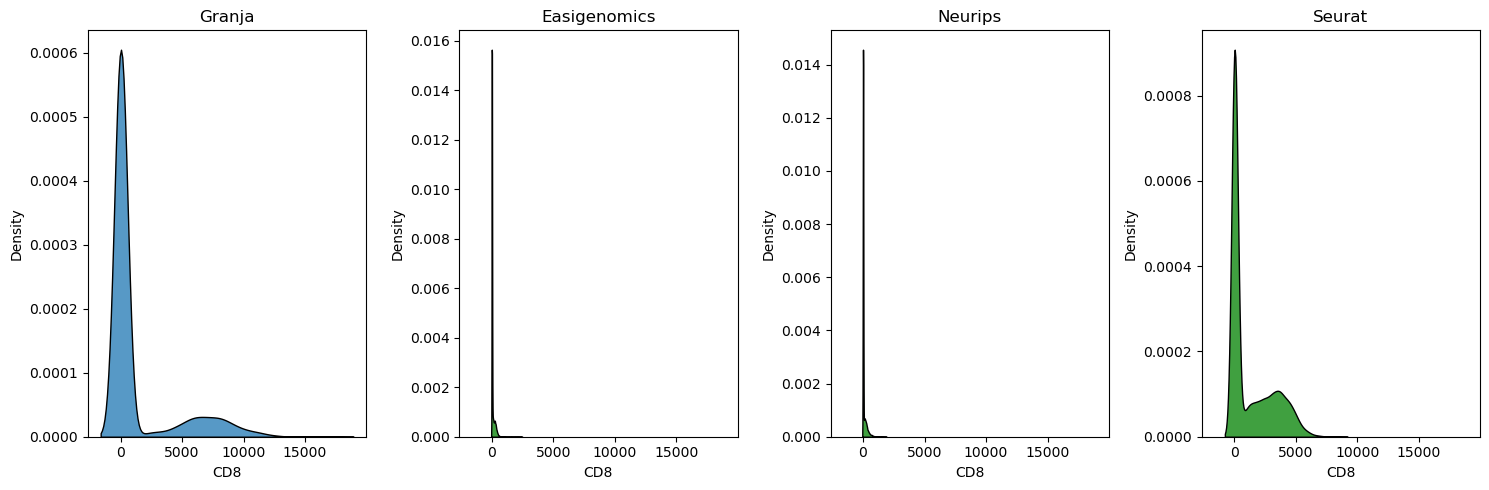

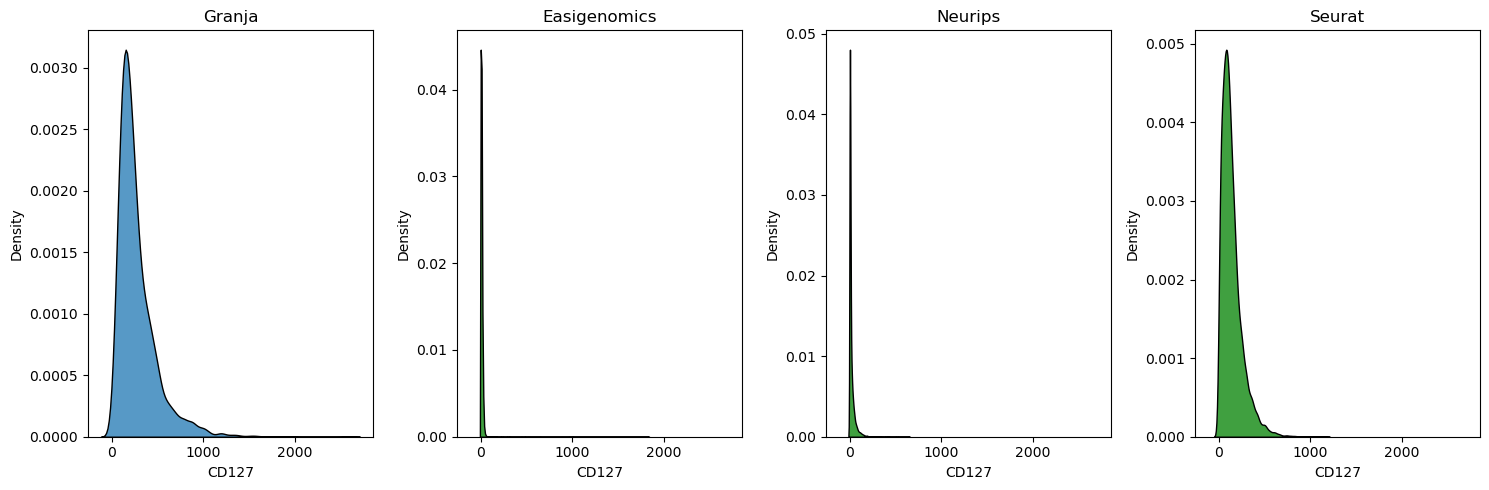

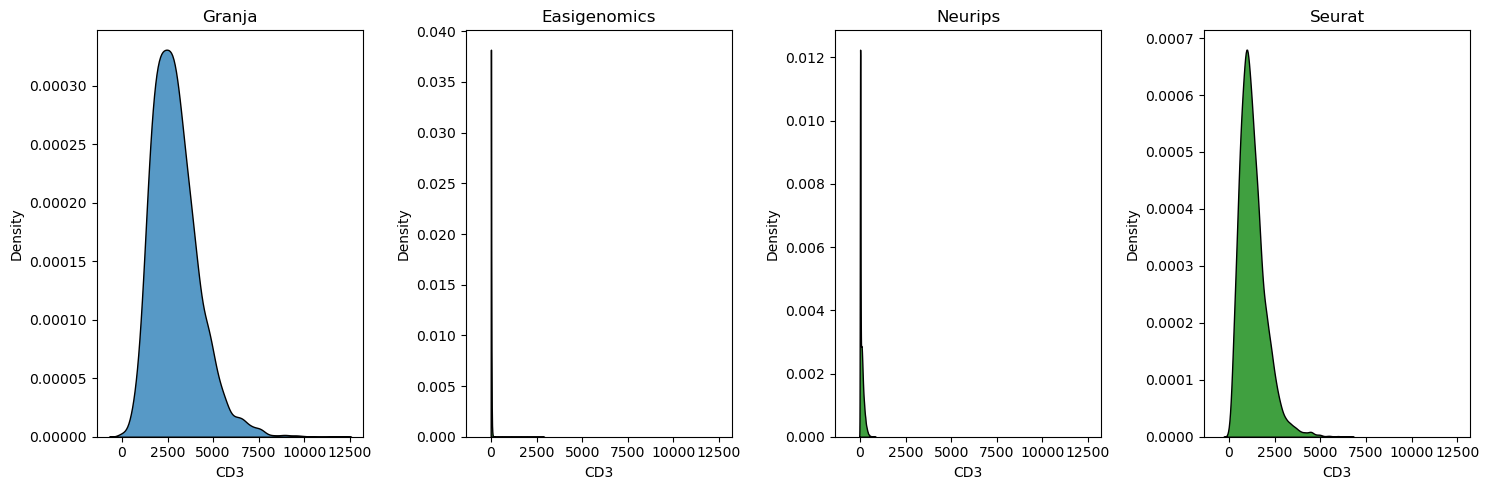

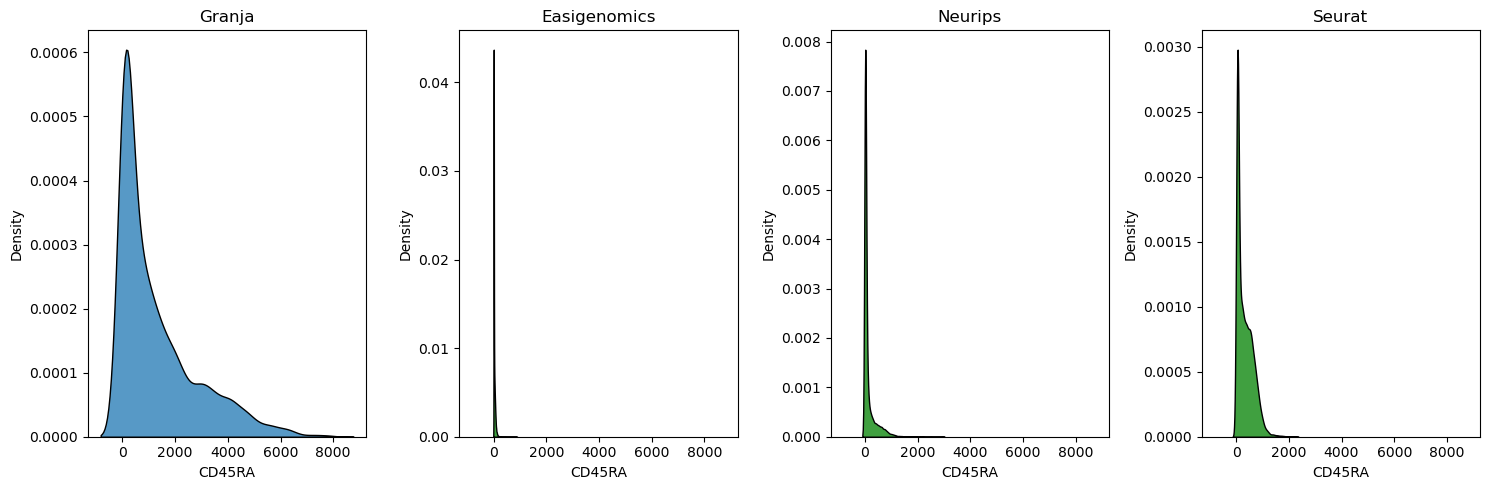

In [71]:
#All markers that are common between datasets, raw, shared x-axis
markers = markers_all

for column_name in markers:
    fig, ax =plt.subplots(1,4 ,tight_layout=True, figsize=(15, 5), sharex=True)
    fig.show()

    ax1 = sns.kdeplot(data=granja_tcell_prot, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=easi_nkt_prot, x=column_name, multiple="stack", color="g", ax=ax[1]) ;
    ax3 = sns.kdeplot(data=neurips_tcell_prot, x=column_name, multiple="stack", color="g", ax=ax[2]) ;
    ax4 = sns.kdeplot(data=seurat_tcell_prot, x=column_name, multiple="stack", color="g", ax=ax[3]) ;

    ax1.title.set_text('Granja')    
    ax2.title.set_text('Easigenomics')
    ax3.title.set_text('Neurips')
    ax4.title.set_text('Seurat')
    
    plt.show()

In [74]:
x=np.log(granja_tcell_prot[markers_all])
x["dataset"]="Granja"

y=np.log(easi_nkt_prot[markers_all])
y["dataset"]="Easigenomics"

z=np.log(neurips_tcell_prot[markers_all])
z["dataset"]="Neurips"

å=np.log(seurat_tcell_prot[markers_all])
å["dataset"]="Seurat"

df_tcells=pd.concat([x,y,z,å])

df_tcells

CD56    CD45RO       CD8     CD127  \
BMMC_D1T1:AAACCCAAGATGCAGC-1  2.484907  6.920672  3.806662  6.366470   
BMMC_D1T1:AAACGAACAGCAGTCC-1  2.564949  6.559615  3.401197  6.184149   
BMMC_D1T1:AAACGAACATGACGAG-1  2.995732  3.583519  8.978282  5.023881   
BMMC_D1T1:AAACGAATCAAGCCAT-1  2.708050  6.513230  3.555348  6.381816   
BMMC_D1T1:AAACGCTAGCCGTAAG-1  2.302585  4.276666  3.218876  4.753590   
...                                ...       ...       ...       ...   
b_TTTGTCATCATAGCAC-1          1.098612  4.343805  2.833213  5.043425   
b_TTTGTCATCCGAGCCA-1          1.945910  3.828641  2.833213  5.789960   
b_TTTGTCATCCGTAGGC-1          1.098612  1.791759  3.135494  4.343805   
b_TTTGTCATCGCCGTGA-1          1.386294  3.295837  3.850148  4.941642   
b_TTTGTCATCGTTTGCC-1              -inf  1.609438  7.102499  4.276666   

                                  CD19       CD3      CD14       CD4  \
BMMC_D1T1:AAACCCAAGATGCAGC-1  2.079442  8.024862  3.637586  8.514590   
BMMC_D1T1:AAACGAACAGCAGTCC-1  1.609438  7.588830  3.784190  8.581107   
BMMC_D1T1:AAACGAACATGACGAG-1      -inf  7.805475  3.465736  3.367296   
BMMC_D1T1:AAACGAATCAAGCCAT-1  0.693147  8.242756  3.784190  8.158802   
BMMC_D1T1:AAACGCTAGCCGTAAG-1  1.098612  7.651596  3.526361  8.136226   
...                                ...       ...       ...       ...   
b_TTTGTCATCATAGCAC-1          2.708050  7.331060  2.197225  7.110696   
b_TTTGTCATCCGAGCCA-1          2.833213  7.270313  3.218876  7.287561   
b_TTTGTCATCCGTAGGC-1          2.484907  7.660114  2.484907  6.735780   
b_TTTGTCATCGCCGTGA-1          3.295837  7.450080  2.564949  6.983790   
b_TTTGTCATCGTTTGCC-1          1.945910  6.393591  2.197225  5.252273   

                                CD45RA dataset  
BMMC_D1T1:AAACCCAAGATGCAGC-1  4.158883  Granja  
BMMC_D1T1:AAACGAACAGCAGTCC-1  4.454347  Granja  
BMMC_D1T1:AAACGAACATGACGAG-1  8.166784  Granja  
BMMC_D1T1:AAACGAATCAAGCCAT-1  4.262680  Granja  
BMMC_D1T1:AAACGCTAGCCGTAAG-1  6.510258  Granja  
...                                ...     ...  
b_TTTGTCATCATAGCAC-1          3.891820  Seurat  
b_TTTGTCATCCGAGCCA-1          3.931826  Seurat  
b_TTTGTCATCCGTAGGC-1          6.159095  Seurat  
b_TTTGTCATCGCCGTGA-1          5.880533  Seurat  
b_TTTGTCATCGTTTGCC-1          5.652489  Seurat  

[73666 rows x 10 columns]

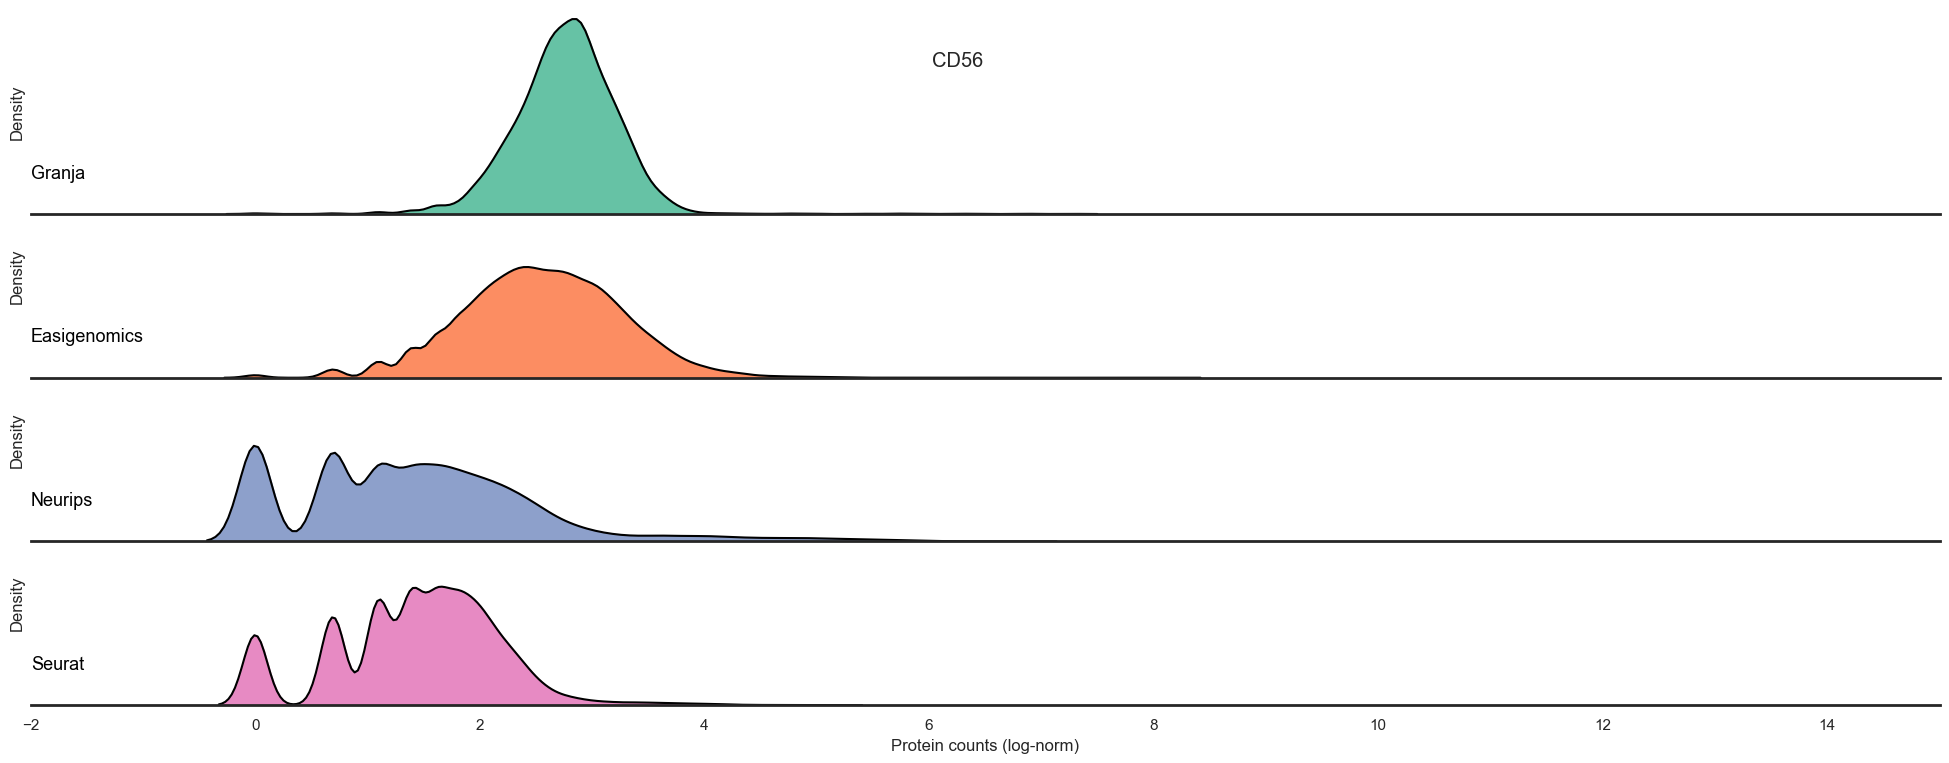

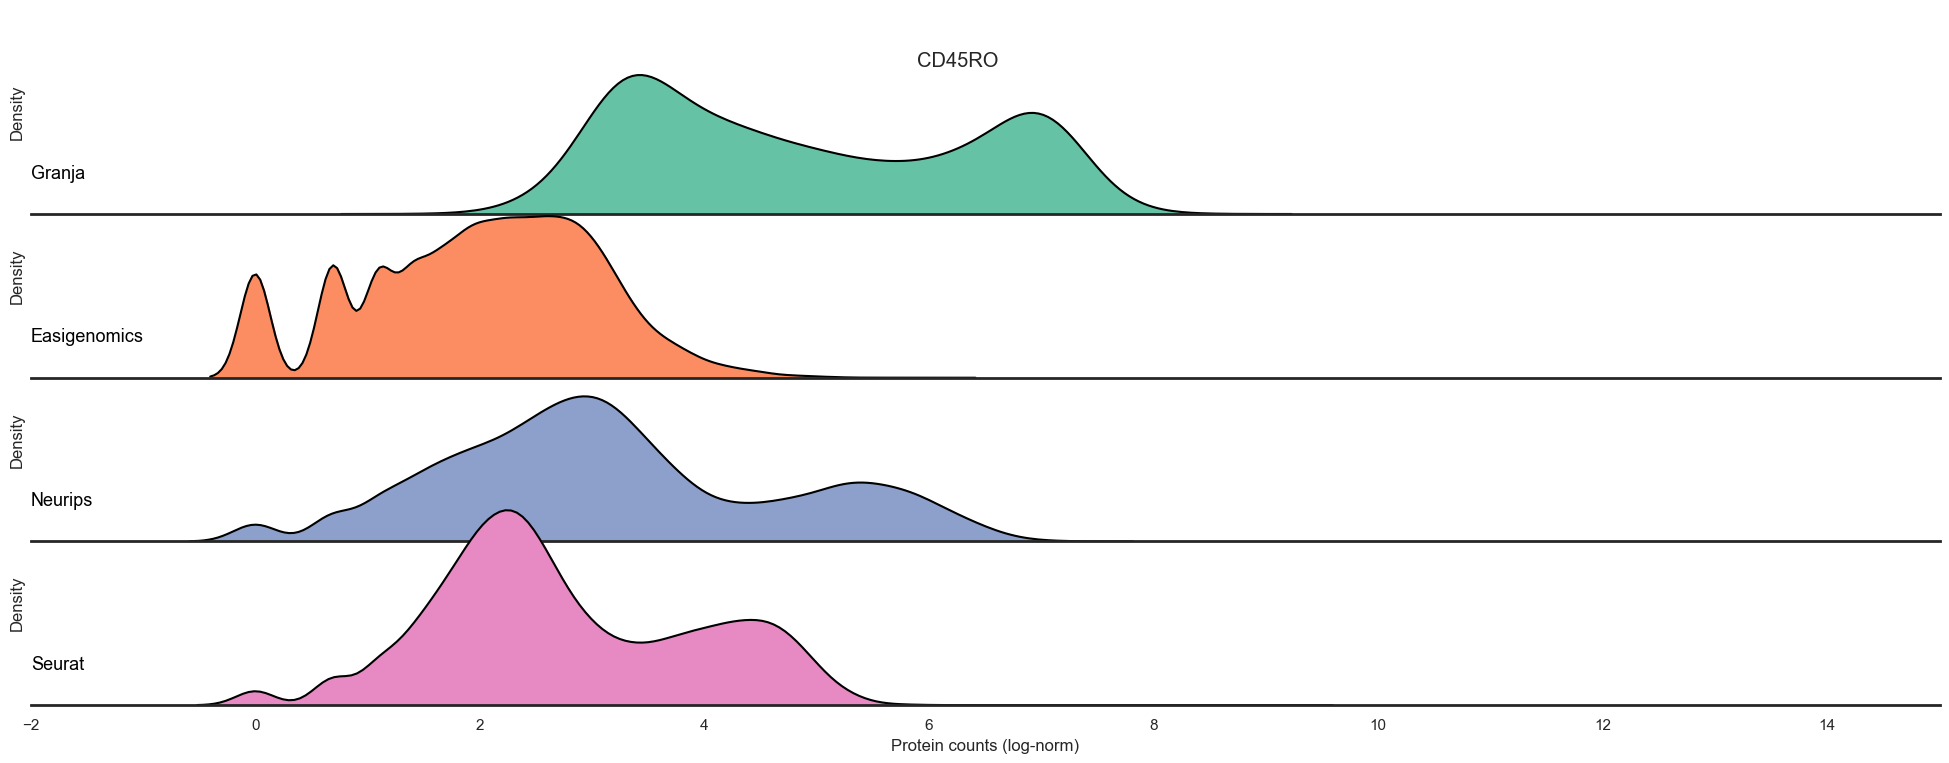

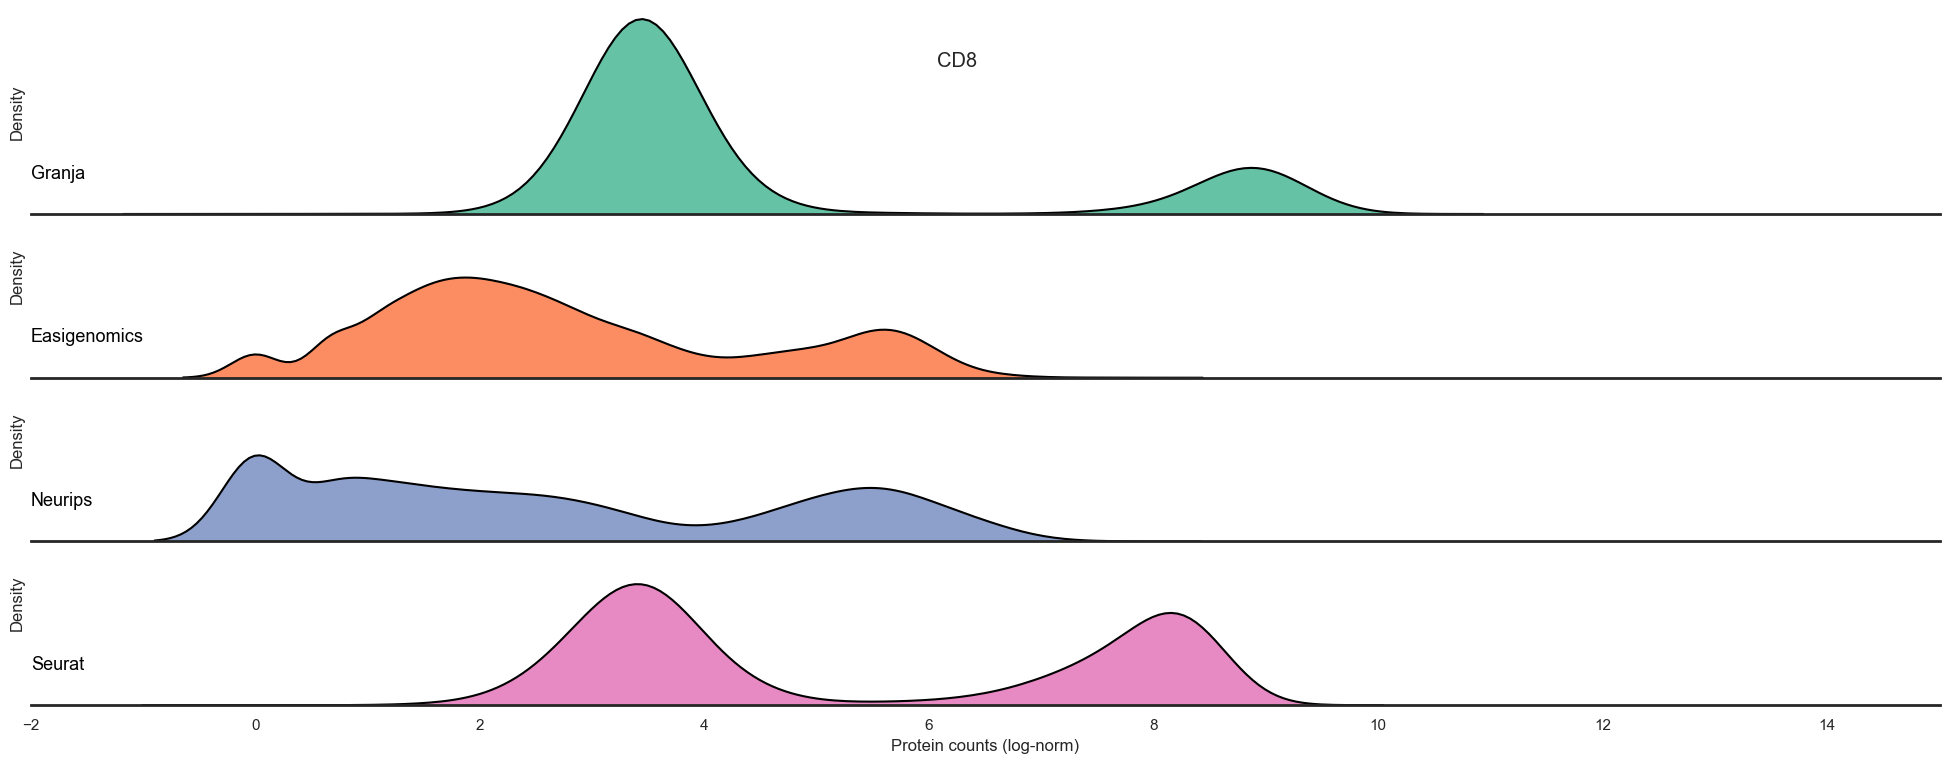

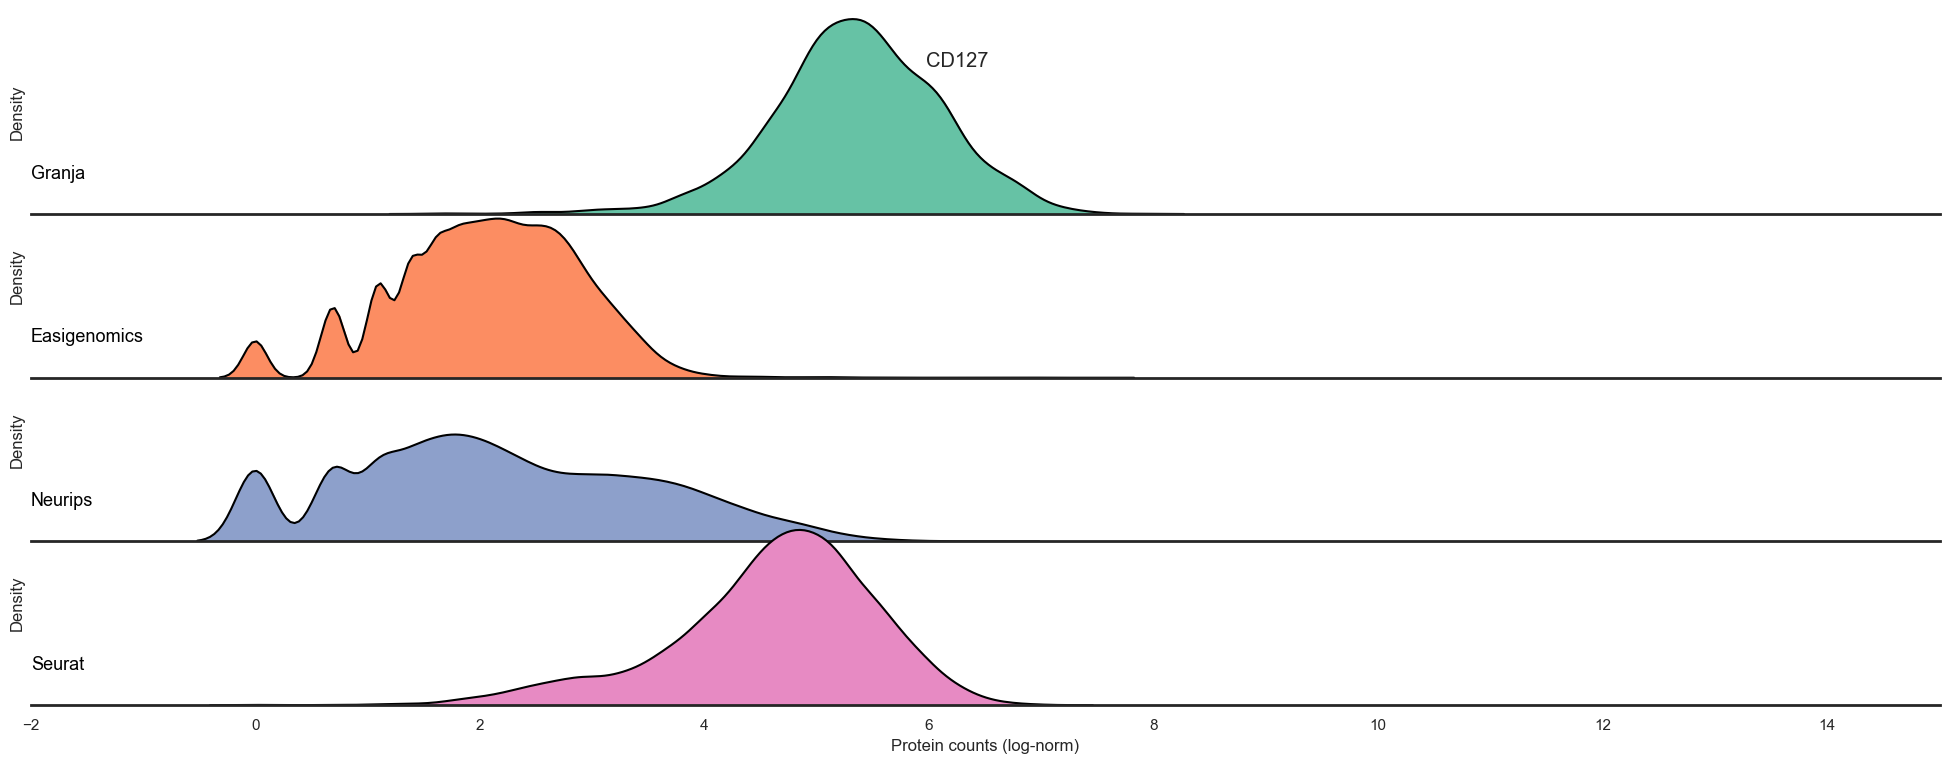

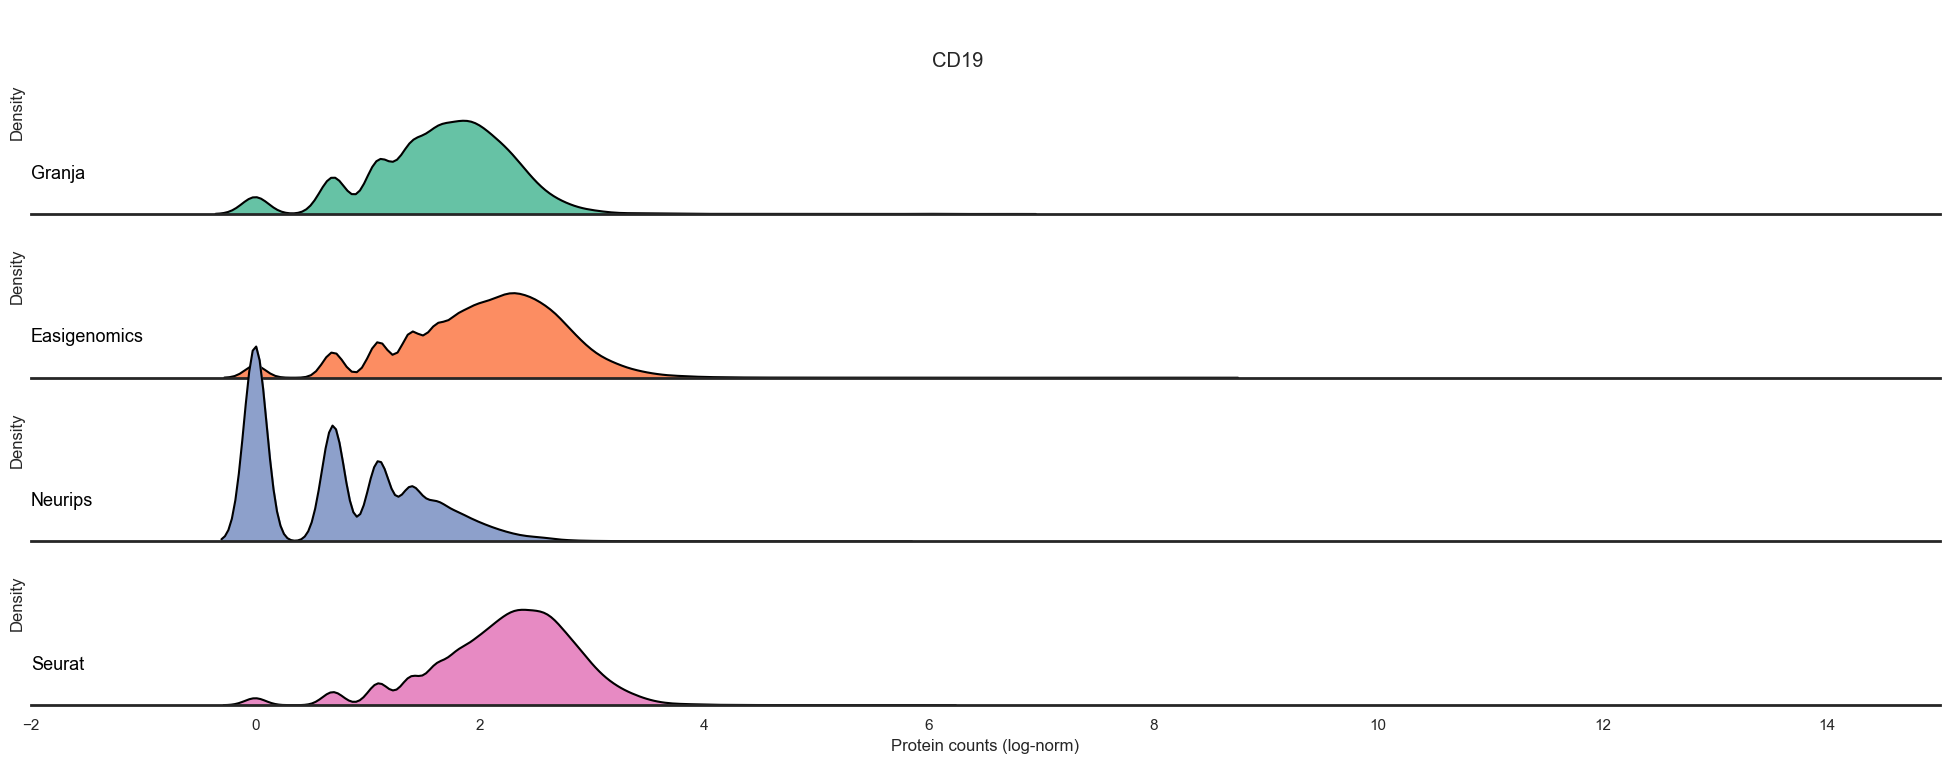

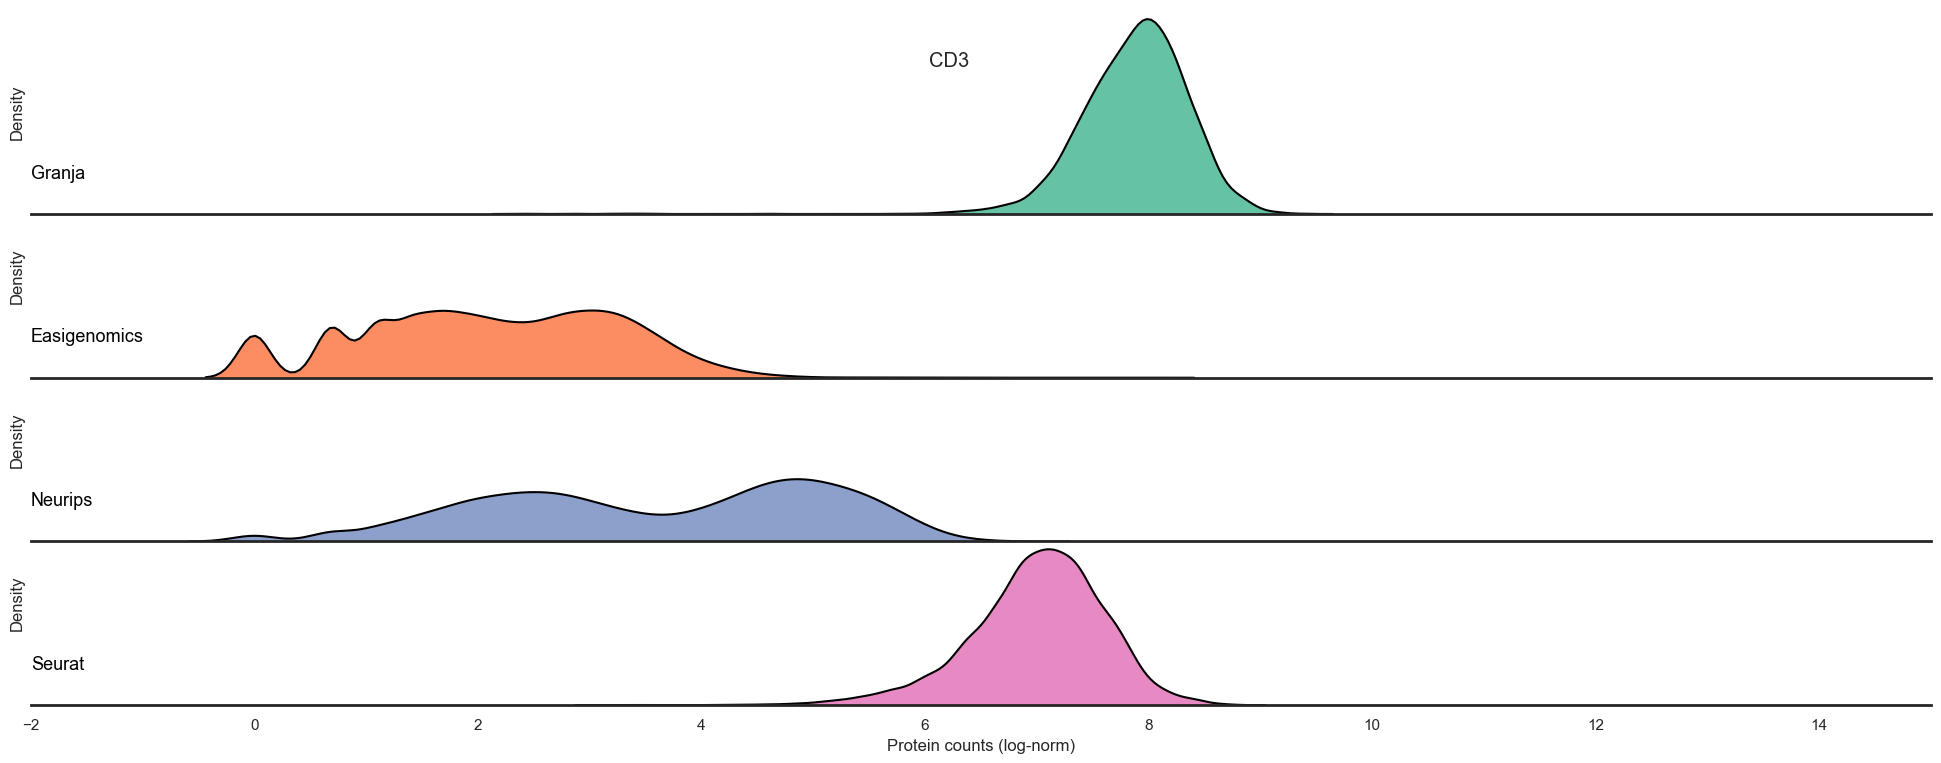

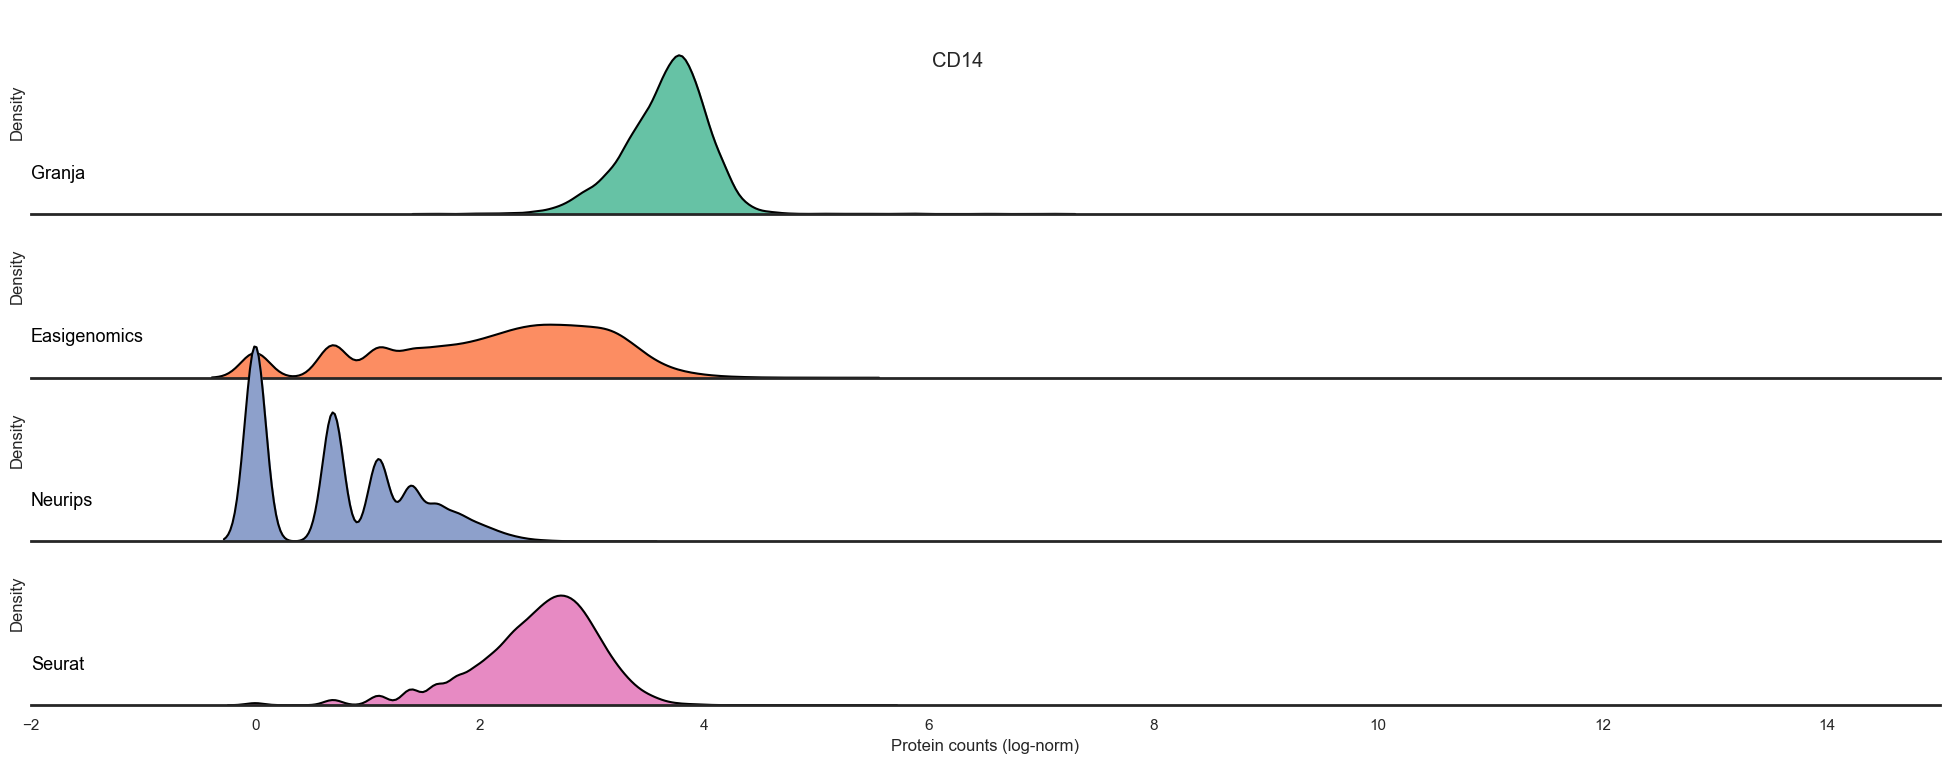

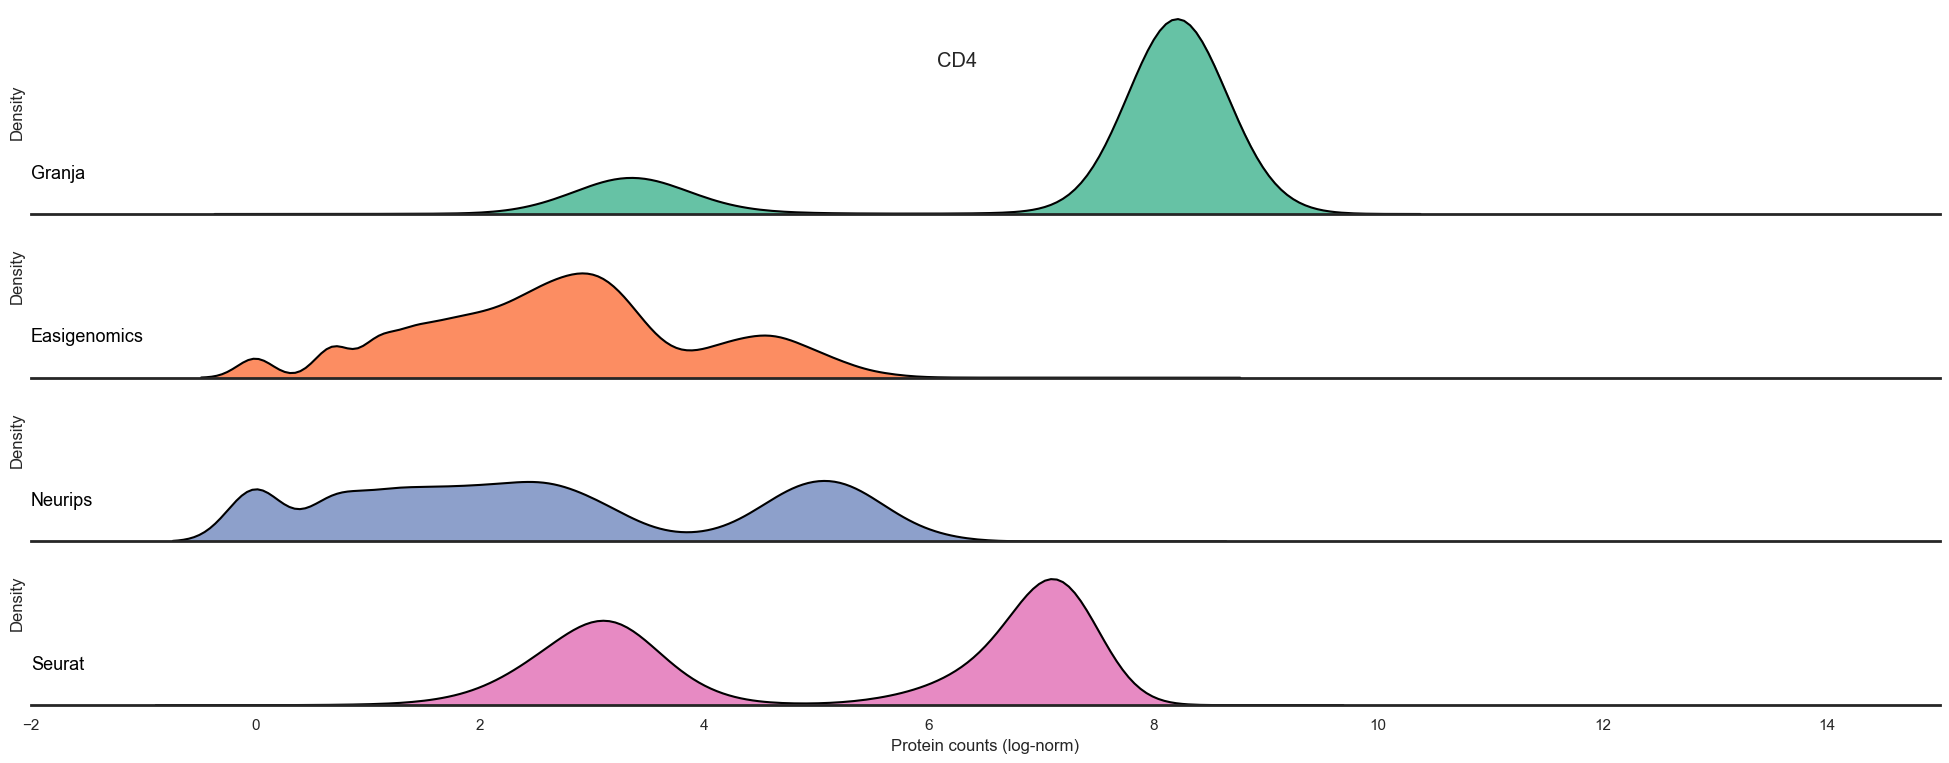

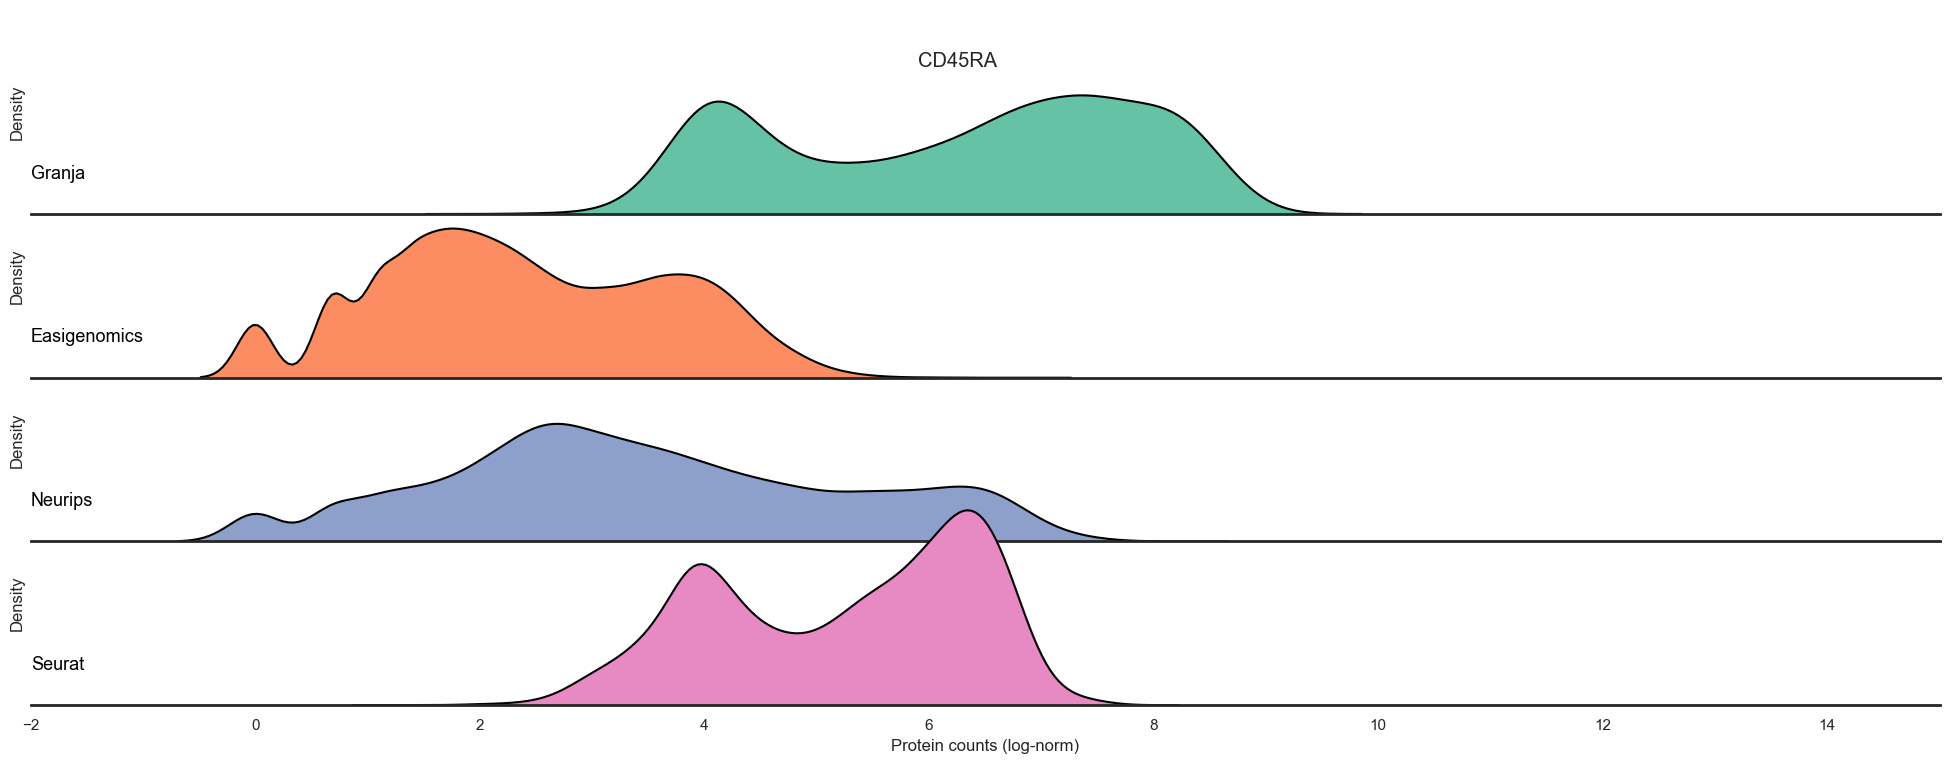

In [79]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)

for marker in markers_all:
    g = sns.FacetGrid(df_tcells, palette=palette, row="dataset", hue="dataset", aspect=10, height=2)

    g.map_dataframe(sns.kdeplot, x=marker, fill=True, alpha=1)
    g.map_dataframe(sns.kdeplot, x=marker, color="black")

    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
    g.map(label, "dataset")
    g.fig.subplots_adjust(hspace=-.2)
    g.set_titles("")
    g.set(yticks=[], xlabel="Protein counts (log-norm)")
    g.despine( left=True)

    plt.suptitle(marker, y=0.9)
    
    g.set(xlim=(-2, 15))